In [62]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.linear_model import LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay,RocCurveDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import AdaBoostClassifier
from sklearn.dummy import DummyClassifier
from sklearn.metrics import confusion_matrix 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.model_selection import validation_curve
from sklearn.model_selection import learning_curve
from sklearn.metrics import roc_curve, auc
from matplotlib import pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

هذا الملف يحتوي على تجربة المودلز و كافة عمليات المعالجة على مجموعة البيانات بدون حل للتوازن البيانات
حل توازن البيانات في ملف اخر 

In [1]:
from google.colab import drive
drive.mount('/content/drive')

In [64]:
dataset =  pd.read_csv("healthcare-dataset-stroke-data.csv")

In [65]:
def normalize(value, old_max, old_min, new_max=1, new_min=0):
    old_range = (old_max - old_min)  
    new_range = (new_max - new_min)  
    return (((value - old_min) * new_range) / old_range) + new_min

In [66]:
dataset['bmi'] = dataset['bmi'].fillna(dataset['bmi'].median())

In [67]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
def encoding(dataset,column_name):
  label_encoder = LabelEncoder()
  return label_encoder.fit_transform(dataset[column_name])

In [68]:
dataset.head()

id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  28.1     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1

In [69]:
dataset = dataset.drop('id',axis =1)

In [70]:
datasetWithOnehatEncoding = dataset.copy()

In [71]:
def toOneHatEncoder(columnName):
  onehatencoder = OneHotEncoder()
  work_type = onehatencoder.fit_transform(datasetWithOnehatEncoding[[columnName]])
  return onehatencoder,work_type.toarray()

In [72]:
ohe , work_type = toOneHatEncoder('work_type')
datasetWithOnehatEncoding[ohe.categories_[0]] = work_type
datasetWithOnehatEncoding.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Govt_job  \
0          Urban             228.69  36.6  formerly smoked       1       0.0   
1          Rural             202.21  28.1     never smoked       1       0.0   
2          Rural             105.92  32.5     never smoked       1       0.0   
3          Urban             171.23  34.4           smokes       1       0.0   
4          Rural             174.12  24.0     never smoked       1       0.0   

   Never_worked  Private  Self-employed  children  
0           0.0      1.0            0.0       0.0  
1           0.0      0.0            1.0       0.0  
2           0.0      1.0            0.0       0.0  
3           0.0      1.0            0.0       0.0  
4           0.0      0.0            1.0       0.0

In [73]:
ohe , smoking_status = toOneHatEncoder('smoking_status')
datasetWithOnehatEncoding[ohe.categories_[0]] = smoking_status
datasetWithOnehatEncoding.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  stroke  Govt_job  \
0          Urban             228.69  36.6  formerly smoked       1       0.0   
1          Rural             202.21  28.1     never smoked       1       0.0   
2          Rural             105.92  32.5     never smoked       1       0.0   
3          Urban             171.23  34.4           smokes       1       0.0   
4          Rural             174.12  24.0     never smoked       1       0.0   

   Never_worked  Private  Self-employed  children  Unknown  formerly smoked  \
0           0.0      1.0            0.0       0.0      0.0              1.0   
1           0.0      0.0            1.0       0.0      0.0              0.0   
2           0.0      1.0            0.0       0.0      0.0              0.0   
3           0.0      1.0            0.0       0.0      0.0              0.0   
4           0.0      0.0            1.0       0.0      0.0              0.0   

   never smoked  smokes  
0           0.0     0.0  
1           1.0     0.0  
2           1.0     0.0  
3           0.0     1.0  
4           1.0     0.0

In [74]:
ohe , gender = toOneHatEncoder('gender')
datasetWithOnehatEncoding[ohe.categories_[0]] = gender
datasetWithOnehatEncoding.head()

gender   age  hypertension  heart_disease ever_married      work_type  \
0    Male  67.0             0              1          Yes        Private   
1  Female  61.0             0              0          Yes  Self-employed   
2    Male  80.0             0              1          Yes        Private   
3  Female  49.0             0              0          Yes        Private   
4  Female  79.0             1              0          Yes  Self-employed   

  Residence_type  avg_glucose_level   bmi   smoking_status  ...  Private  \
0          Urban             228.69  36.6  formerly smoked  ...      1.0   
1          Rural             202.21  28.1     never smoked  ...      0.0   
2          Rural             105.92  32.5     never smoked  ...      1.0   
3          Urban             171.23  34.4           smokes  ...      1.0   
4          Rural             174.12  24.0     never smoked  ...      0.0   

   Self-employed  children  Unknown  formerly smoked  never smoked  smokes  \
0            0.0       0.0      0.0              1.0           0.0     0.0   
1            1.0       0.0      0.0              0.0           1.0     0.0   
2            0.0       0.0      0.0              0.0           1.0     0.0   
3            0.0       0.0      0.0              0.0           0.0     1.0   
4            1.0       0.0      0.0              0.0           1.0     0.0   

   Female  Male  Other  
0     0.0   1.0    0.0  
1     1.0   0.0    0.0  
2     0.0   1.0    0.0  
3     1.0   0.0    0.0  
4     1.0   0.0    0.0  

[5 rows x 23 columns]

In [75]:
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('smoking_status',axis=1)
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('gender',axis=1)
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('work_type',axis=1)
datasetWithOnehatEncoding = datasetWithOnehatEncoding.drop('Other',axis=1)

In [76]:
datasetWithOnehatEncoding.head()

age  hypertension  heart_disease ever_married Residence_type  \
0  67.0             0              1          Yes          Urban   
1  61.0             0              0          Yes          Rural   
2  80.0             0              1          Yes          Rural   
3  49.0             0              0          Yes          Urban   
4  79.0             1              0          Yes          Rural   

   avg_glucose_level   bmi  stroke  Govt_job  Never_worked  Private  \
0             228.69  36.6       1       0.0           0.0      1.0   
1             202.21  28.1       1       0.0           0.0      0.0   
2             105.92  32.5       1       0.0           0.0      1.0   
3             171.23  34.4       1       0.0           0.0      1.0   
4             174.12  24.0       1       0.0           0.0      0.0   

   Self-employed  children  Unknown  formerly smoked  never smoked  smokes  \
0            0.0       0.0      0.0              1.0           0.0     0.0   
1            1.0       0.0      0.0              0.0           1.0     0.0   
2            0.0       0.0      0.0              0.0           1.0     0.0   
3            0.0       0.0      0.0              0.0           0.0     1.0   
4            1.0       0.0      0.0              0.0           1.0     0.0   

   Female  Male  
0     0.0   1.0  
1     1.0   0.0  
2     0.0   1.0  
3     1.0   0.0  
4     1.0   0.0

In [77]:

datasetWithOnehatEncoding['ever_married'] = encoding(datasetWithOnehatEncoding,'ever_married')
datasetWithOnehatEncoding['Residence_type'] = encoding(datasetWithOnehatEncoding,'Residence_type')

In [78]:
data = datasetWithOnehatEncoding.copy()
data = data[data['age']>1]
print(data.shape)

maxAge = data['age'].max()
minAge = data['age'].min()
data['age'] = data['age'].apply(lambda x: normalize(x,maxAge, minAge))

maxGlu = data['avg_glucose_level'].max()
minGlu = data['avg_glucose_level'].min()
data['avg_glucose_level'] = data['avg_glucose_level'].apply(lambda x: normalize(x,maxGlu, minGlu))

maxBmi = data['bmi'].max()
minBmi = data['bmi'].min()
data['bmi'] = data['bmi'].apply(lambda x: normalize(x,maxBmi, minBmi))

datasetWithOnehatEncoding = data
datasetWithOnehatEncoding

(5062, 19)


age  hypertension  heart_disease  ever_married  Residence_type  \
0     0.814632             0              1             1               1   
1     0.740484             0              0             1               0   
2     0.975284             0              1             1               0   
3     0.592190             0              0             1               1   
4     0.962926             1              0             1               0   
...        ...           ...            ...           ...             ...   
5105  0.975284             1              0             1               1   
5106  0.987642             0              0             1               1   
5107  0.419179             0              0             1               0   
5108  0.616906             0              0             1               0   
5109  0.530400             0              0             1               1   

      avg_glucose_level       bmi  stroke  Govt_job  Never_worked  Private  \
0              0.801265  0.301260       1       0.0           0.0      1.0   
1              0.679023  0.203895       1       0.0           0.0      0.0   
2              0.234512  0.254296       1       0.0           0.0      1.0   
3              0.536008  0.276060       1       0.0           0.0      1.0   
4              0.549349  0.156930       1       0.0           0.0      0.0   
...                 ...       ...     ...       ...           ...      ...   
5105           0.132167  0.203895       0       0.0           0.0      1.0   
5106           0.323516  0.340206       0       0.0           0.0      0.0   
5107           0.128658  0.232532       0       0.0           0.0      0.0   
5108           0.513203  0.175258       0       0.0           0.0      1.0   
5109           0.139230  0.182131       0       1.0           0.0      0.0   

      Self-employed  children  Unknown  formerly smoked  never smoked  smokes  \
0               0.0       0.0      0.0              1.0           0.0     0.0   
1               1.0       0.0      0.0              0.0           1.0     0.0   
2               0.0       0.0      0.0              0.0           1.0     0.0   
3               0.0       0.0      0.0              0.0           0.0     1.0   
4               1.0       0.0      0.0              0.0           1.0     0.0   
...             ...       ...      ...              ...           ...     ...   
5105            0.0       0.0      0.0              0.0           1.0     0.0   
5106            1.0       0.0      0.0              0.0           1.0     0.0   
5107            1.0       0.0      0.0              0.0           1.0     0.0   
5108            0.0       0.0      0.0              1.0           0.0     0.0   
5109            0.0       0.0      1.0              0.0           0.0     0.0   

      Female  Male  
0        0.0   1.0  
1        1.0   0.0  
2        0.0   1.0  
3        1.0   0.0  
4        1.0   0.0  
...      ...   ...  
5105     1.0   0.0  
5106     1.0   0.0  
5107     1.0   0.0  
5108     0.0   1.0  
5109     1.0   0.0  

[5062 rows x 19 columns]

In [79]:
input_oneHatEn = datasetWithOnehatEncoding.drop('stroke',axis =1)
output_oneHatEn  = datasetWithOnehatEncoding['stroke']
input_oneHatEn  = np.asarray(input_oneHatEn)
output_oneHatEn = np.asarray(output_oneHatEn)

In [80]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(input_oneHatEn,output_oneHatEn,random_state=0)

In [81]:
print(f'x_train', x_train.shape)
print(f'y_train',y_train.shape)
print(f'x_test',x_test.shape)
print(f'y_test',y_test.shape)

x_train (3796, 18)
y_train (3796,)
x_test (1266, 18)
y_test (1266,)


In [82]:
def print_cm(cm, labels, hide_zeroes=False, hide_diagonal=False, hide_threshold=None):
    """pretty print for confusion matrixes"""
    columnwidth = max([len(x) for x in labels] + [5])  # 5 is value length
    empty_cell = " " * columnwidth
    # Print header
    print("    " + empty_cell, end=" ")
    for label in labels:
        print("%{0}s".format(columnwidth) % label, end=" ")
    print()
    # Print rows
    for i, label1 in enumerate(labels):
        print("    %{0}s".format(columnwidth) % label1, end=" ")
        for j in range(len(labels)):
            cell = "%{0}.1f".format(columnwidth) % cm[i, j]
            if hide_zeroes:
                cell = cell if float(cm[i, j]) != 0 else empty_cell
            if hide_diagonal:
                cell = cell if i != j else empty_cell
            if hide_threshold:
                cell = cell if cm[i, j] > hide_threshold else empty_cell
            print(cell, end=" ")
        print()

In [83]:
results = pd.DataFrame(columns = ['Model','Train_Score',"Test_Score","Precision","Recall","Auc","F1"])

In [84]:
def models(modelName , defintionTheModelAndHisParameter,x_train,y_train,x_test,y_test,model,parameter,pRange,results = results):
    classifier = defintionTheModelAndHisParameter.fit(x_train,y_train)
    y_predicted = classifier.predict(x_test)
    confusionMatrixForTheClassifier = confusion_matrix(y_test,y_predicted )
    precision = precision_score(y_test,y_predicted)
    recall = recall_score(y_test,y_predicted)
    scoreOnTest = classifier.score(x_test,y_test)
    scoreOnTrain =classifier.score(x_train,y_train)
    classificationReportForTheClassifier =classification_report(y_test, y_predicted)
    auc1 = roc_auc_score(y_test, y_predicted)
    f1 = f1_score(y_test, y_predicted)
    print(modelName)
    print("score on train data with", modelName," :", scoreOnTrain)
    print("---------------------------------------------------------------------------------------")
    print("score on test data with ", modelName," :",scoreOnTest)
    print("---------------------------------------------------------------------------------------")
    print("preceision: ", precision)
    print("---------------------------------------------------------------------------------------")
    print("recall: ",recall)
    print("---------------------------------------------------------------------------------------")
    print("Most frequent class (",modelName,")\n")
    print_cm(confusionMatrixForTheClassifier, ['Not one', 'One'])
    print("---------------------------------------------------------------------------------------")
    print("classification report:\n",confusionMatrixForTheClassifier)
    print("---------------------------------------------------------------------------------------")
    print('Test set AUC: ', auc1)
    print("---------------------------------------------------------------------------------------")
    print('F1: ',f1)
    ####Learning curve
    fig, ax = plt.subplots(1, 2, figsize=(16, 6))

    N, train_lc, val_lc = learning_curve(defintionTheModelAndHisParameter,
                                         x_train, y_train, cv=7,
                                         train_sizes=np.linspace(0.3, 1, 25))

    ax[0].plot(N, np.mean(train_lc, 1), color='blue', label='training score')
    ax[0].plot(N, np.mean(val_lc, 1), color='red', label='validation score')
    ax[0].hlines(np.mean([train_lc[-1], val_lc[-1]]), N[0], N[-1],
                 color='gray', linestyle='dashed')

    ax[0].set_ylim((0, 1))
    ax[0].set_xlim((N[0], N[-1]))
    ax[0].set_xlabel('training size')
    ax[0].set_ylabel('score')
    ax[0].set_title('Leaning curve')
    ax[0].legend(loc='best')
    ######    Validation curve
    name = parameter
    print(name)
    train_score, val_score = validation_curve(model, x_train, y_train,
                                          param_name= name ,
                                          param_range = pRange,
                                          cv=7)
    ax[1].plot(pRange, np.median(train_score, 1), color='blue', label='training score')
    ax[1].plot(pRange, np.median(val_score, 1), color='red', label='validation score')
    ax[1].legend(loc='best')
    ax[1].set_ylim(0, 1)
    ax[1].set_xlabel('pRange')
    ax[1].set_ylabel('score')
  ### auc 
    fpr_lr, tpr_lr, _ = roc_curve(y_test, y_predicted)
    roc_auc_lr = auc(fpr_lr, tpr_lr)

    plt.figure()
    plt.xlim([0.0, 1.00])
    plt.ylim([0.0, 1.05])
    plt.plot(fpr_lr, tpr_lr, lw=2, label='LogRegr ROC curve (area = {:0.2f})'.format(roc_auc_lr))
    plt.xlabel('False Positive Rate', fontsize=16)
    plt.ylabel('True Positive Rate', fontsize=16)
    plt.title('ROC curve (1-of-10 digits classifier)', fontsize=16)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.show()



    i = results.shape[0]
    results.loc[i,'Model'] = modelName
    results.loc[i,'Train_Score'] = scoreOnTrain
    results.loc[i,"Test_Score"] = scoreOnTest
    results.loc[i,"Precision"] = precision
    results.loc[i,'Recall'] = recall
    results.loc[i,'Auc'] = auc1
    results.loc[i,'F1'] = f1
    

DummyClassifier-OneHot
score on train data with DummyClassifier-OneHot  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-OneHot  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-OneHot )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
----------------------------------------------------------------------------

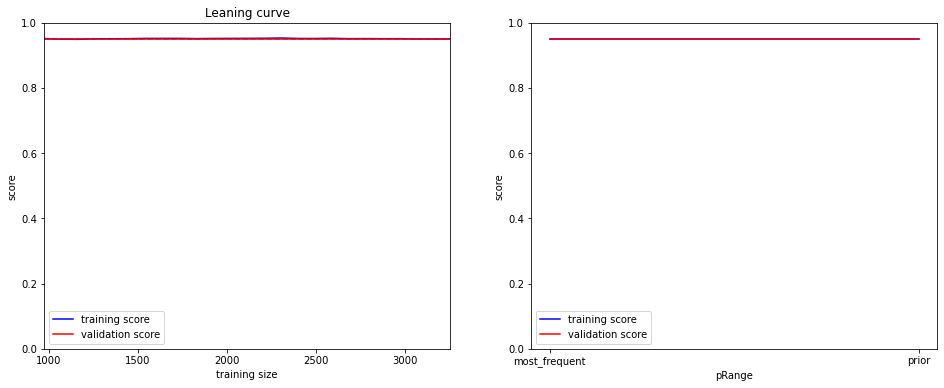

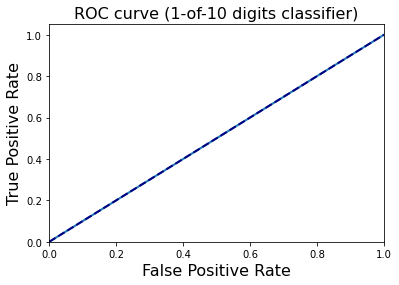

logistic regression-OneHot
score on train data with logistic regression-OneHot  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  logistic regression-OneHot  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-OneHot )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------------------------------------------

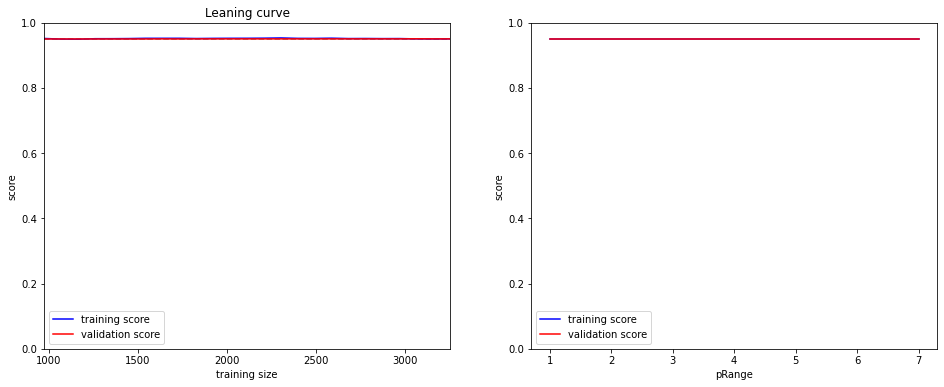

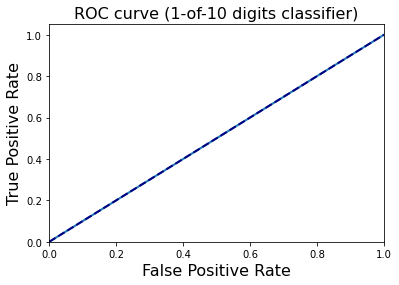

knn-OneHot
score on train data with knn-OneHot  : 0.9517913593256059
---------------------------------------------------------------------------------------
score on test data with  knn-OneHot  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.5
---------------------------------------------------------------------------------------
recall:  0.05
---------------------------------------------------------------------------------------
Most frequent class ( knn-OneHot )

            Not one     One 
    Not one  1203.0     3.0 
        One    57.0     3.0 
---------------------------------------------------------------------------------------
classification report:
 [[1203    3]
 [  57    3]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5237562189054726
---------------------------------------------------------------------------------------
F1:  0.0909090909090

guassianNB-OneHot
score on train data with guassianNB-OneHot  : 0.18229715489989462
---------------------------------------------------------------------------------------
score on test data with  guassianNB-OneHot  : 0.17614533965244866
---------------------------------------------------------------------------------------
preceision:  0.052775250227479524
---------------------------------------------------------------------------------------
recall:  0.9666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-OneHot )

            Not one     One 
    Not one   165.0  1041.0 
        One     2.0    58.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 165 1041]
 [   2   58]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5517412935323383
---------------------------------------------

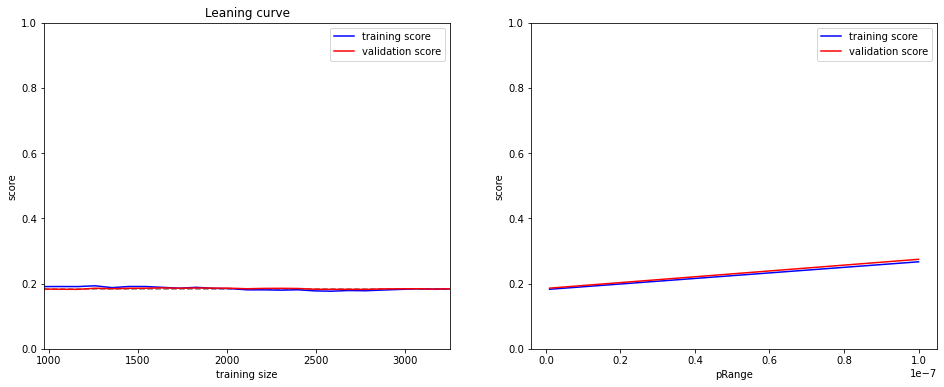

support vector machine-OneHot
score on train data with support vector machine-OneHot  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  support vector machine-OneHot  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-OneHot )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------------------------------

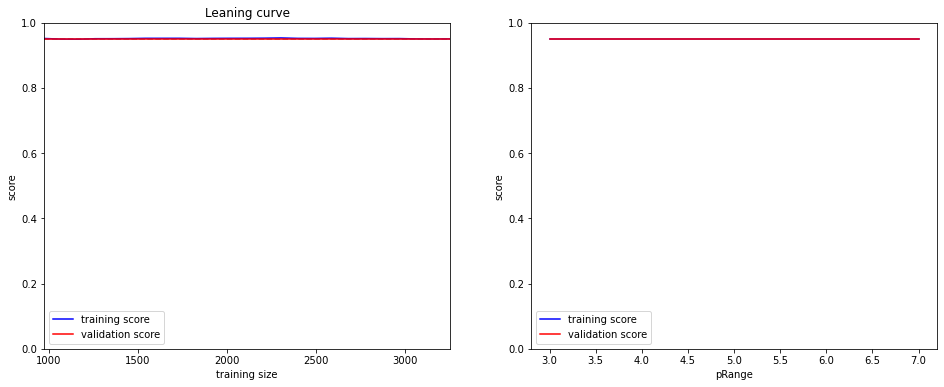

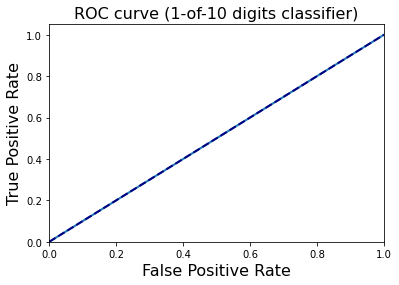

DecisionTree Classifier-OneHot
score on train data with DecisionTree Classifier-OneHot  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-OneHot  : 0.9083728278041074
---------------------------------------------------------------------------------------
preceision:  0.1111111111111111
---------------------------------------------------------------------------------------
recall:  0.13333333333333333
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-OneHot )

            Not one     One 
    Not one  1142.0    64.0 
        One    52.0     8.0 
---------------------------------------------------------------------------------------
classification report:
 [[1142   64]
 [  52    8]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5401326699834162
-----------

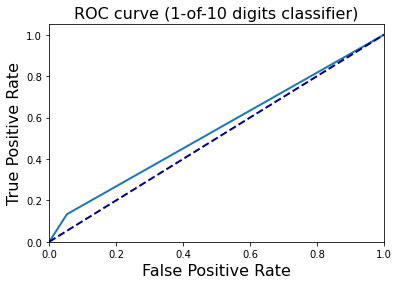

RandomForestClassifier-OneHot
score on train data with RandomForestClassifier-OneHot  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-OneHot  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-OneHot )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
---------------------------------------------------------------

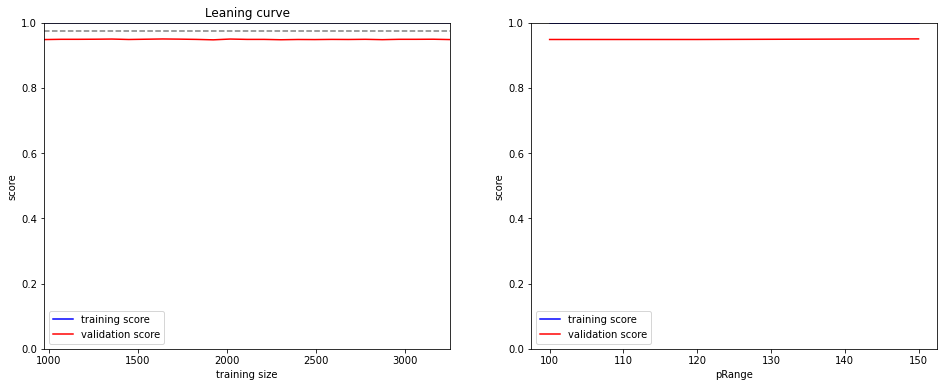

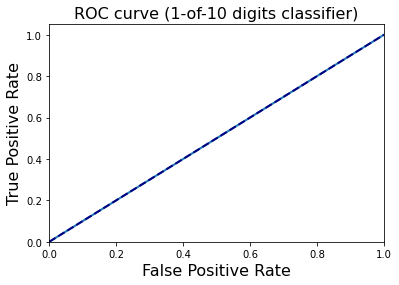

AdaBoostClassifier-OneHot
score on train data with AdaBoostClassifier-OneHot  : 0.9515279241306639
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-OneHot  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-OneHot )

            Not one     One 
    Not one  1205.0     1.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4995854063018242
-----------------------------------------------

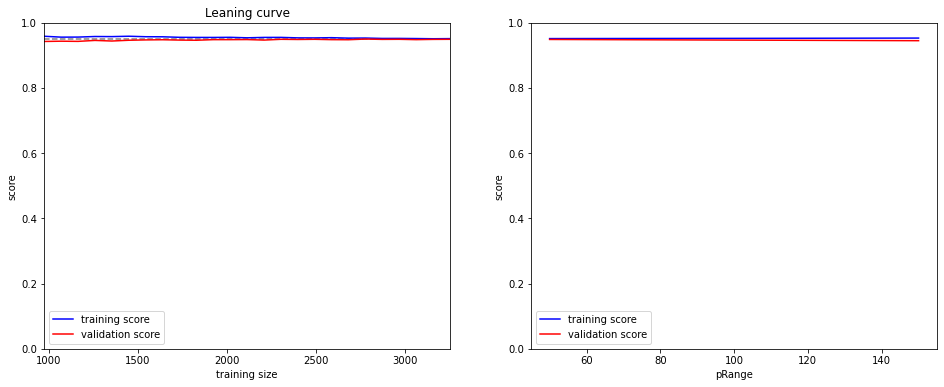

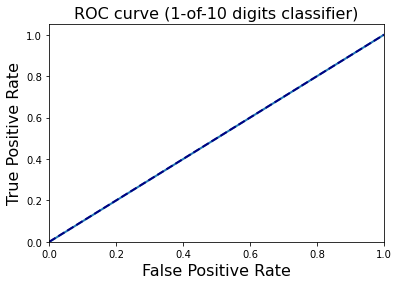

In [85]:
models('DummyClassifier-OneHot',DummyClassifier(strategy = 'most_frequent'),x_train,y_train,x_test,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-OneHot',LogisticRegression(random_state=0),x_train,y_train,x_test,y_test,LogisticRegression(),'C',[1,7])
models('knn-OneHot',KNeighborsClassifier(),x_train,y_train,x_test,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-OneHot',GaussianNB(),x_train,y_train,x_test,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-OneHot',SVC(random_state=0),x_train,y_train,x_test,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-OneHot',DecisionTreeClassifier(random_state=0),x_train,y_train,x_test,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-OneHot',RandomForestClassifier(random_state=0),x_train,y_train,x_test,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-OneHot',AdaBoostClassifier(random_state=0),x_train,y_train,x_test,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

In [1]:
### feature selection 
### grid 
### preprocess data


In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)


DummyClassifier-stdScaler
score on train data with DummyClassifier-stdScaler  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-stdScaler  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-stdScaler )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
----------------------------------------------------------------

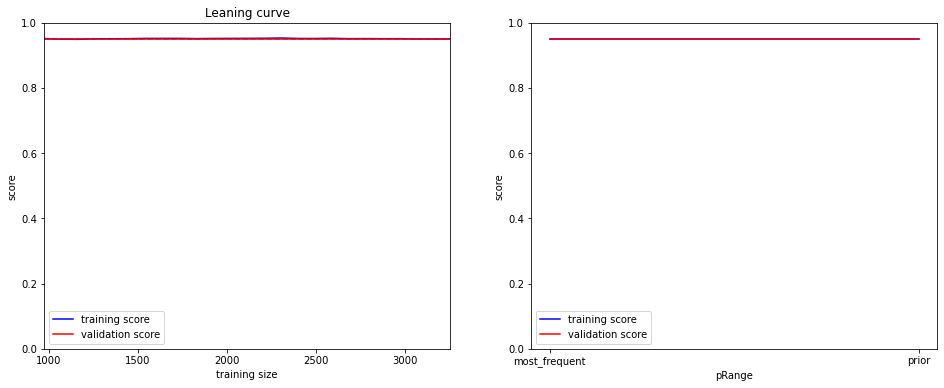

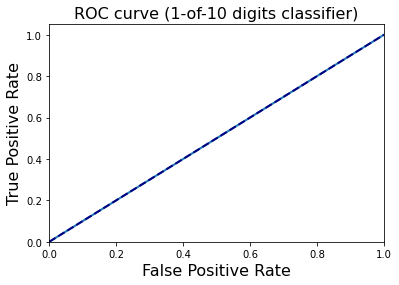

logistic regression-stdScaler
score on train data with logistic regression-stdScaler  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  logistic regression-stdScaler  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.5
---------------------------------------------------------------------------------------
recall:  0.016666666666666666
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-stdScaler )

            Not one     One 
    Not one  1205.0     1.0 
        One    59.0     1.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  59    1]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5079187396351574
----------------

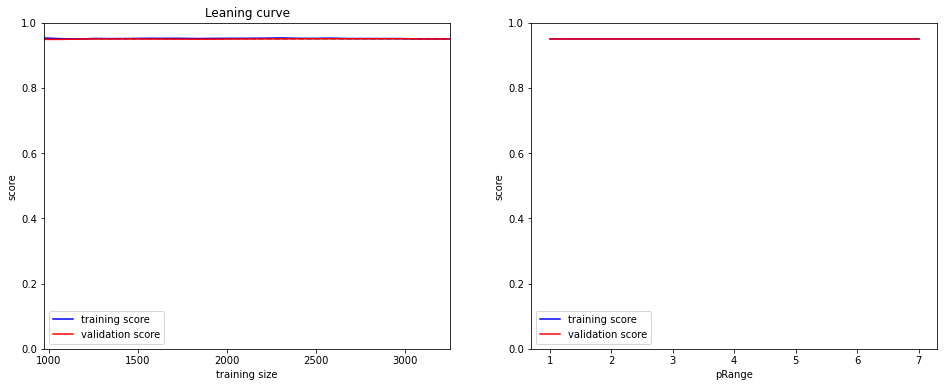

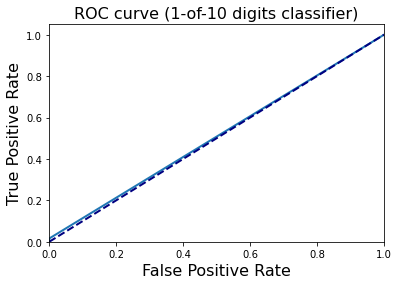

knn-stdScaler
score on train data with knn-stdScaler  : 0.9510010537407798
---------------------------------------------------------------------------------------
score on test data with  knn-stdScaler  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.3333333333333333
---------------------------------------------------------------------------------------
recall:  0.016666666666666666
---------------------------------------------------------------------------------------
Most frequent class ( knn-stdScaler )

            Not one     One 
    Not one  1204.0     2.0 
        One    59.0     1.0 
---------------------------------------------------------------------------------------
classification report:
 [[1204    2]
 [  59    1]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5075041459369818
---------------------------------------------------------------

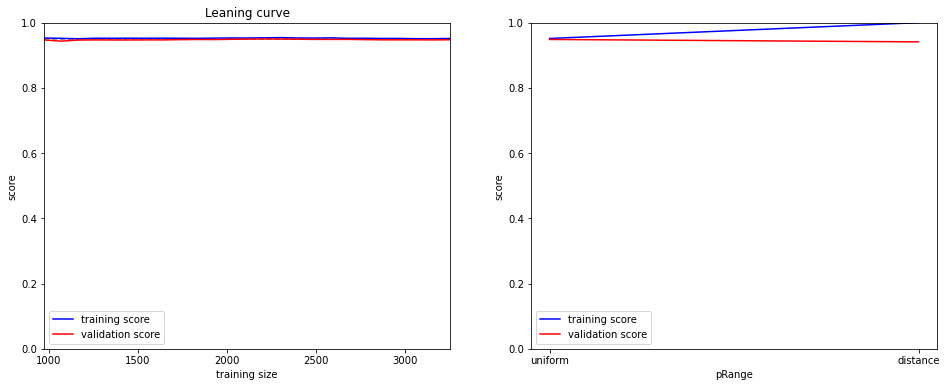

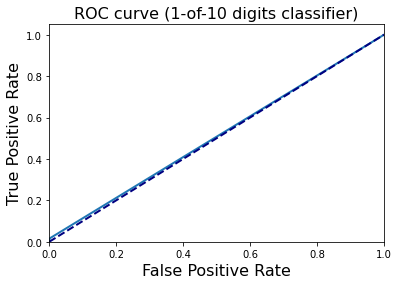

guassianNB-stdScaler
score on train data with guassianNB-stdScaler  : 0.18177028451001054
---------------------------------------------------------------------------------------
score on test data with  guassianNB-stdScaler  : 0.17377567140600317
---------------------------------------------------------------------------------------
preceision:  0.05263157894736842
---------------------------------------------------------------------------------------
recall:  0.9666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-stdScaler )

            Not one     One 
    Not one   162.0  1044.0 
        One     2.0    58.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 162 1044]
 [   2   58]]
---------------------------------------------------------------------------------------
Test set AUC:  0.550497512437811
-----------------------------------

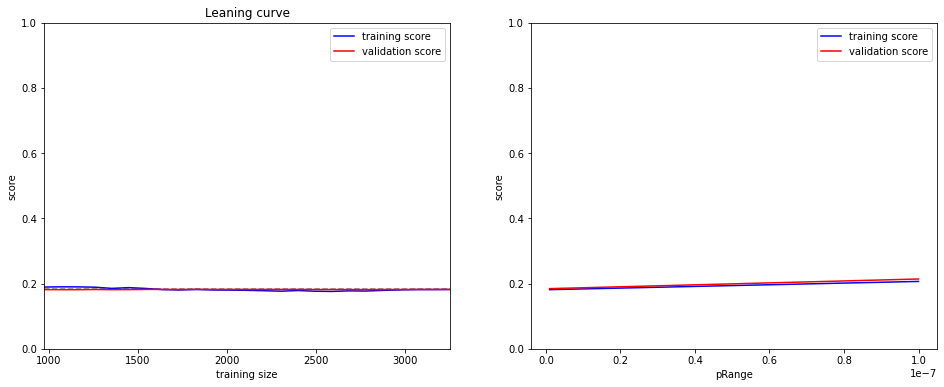

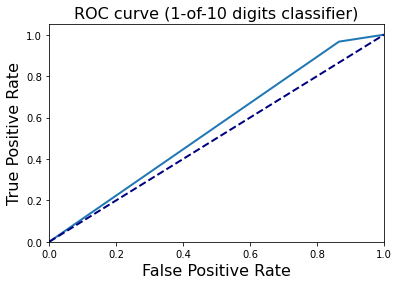

support vector machine-stdScaler
score on train data with support vector machine-stdScaler  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  support vector machine-stdScaler  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-stdScaler )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------------------

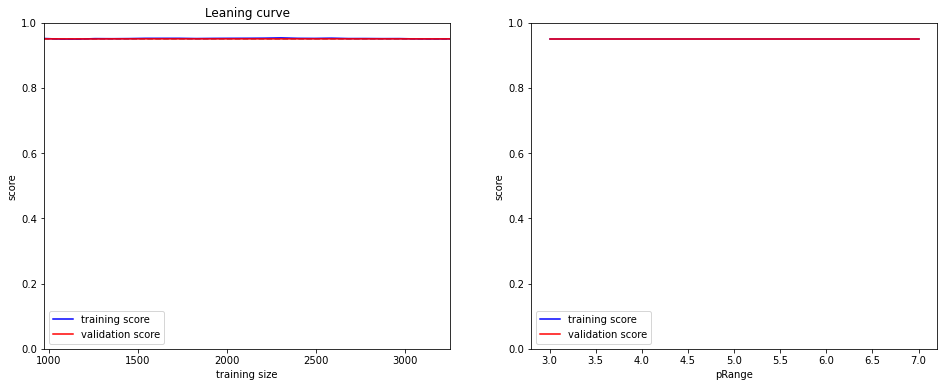

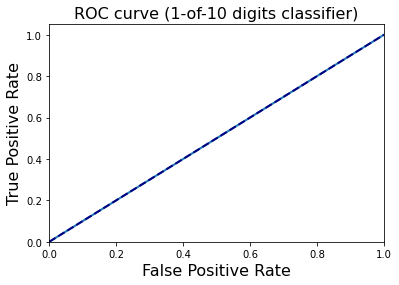

DecisionTree Classifier-stdScaler
score on train data with DecisionTree Classifier-stdScaler  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-stdScaler  : 0.909952606635071
---------------------------------------------------------------------------------------
preceision:  0.11428571428571428
---------------------------------------------------------------------------------------
recall:  0.13333333333333333
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-stdScaler )

            Not one     One 
    Not one  1144.0    62.0 
        One    52.0     8.0 
---------------------------------------------------------------------------------------
classification report:
 [[1144   62]
 [  52    8]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5409618573797679

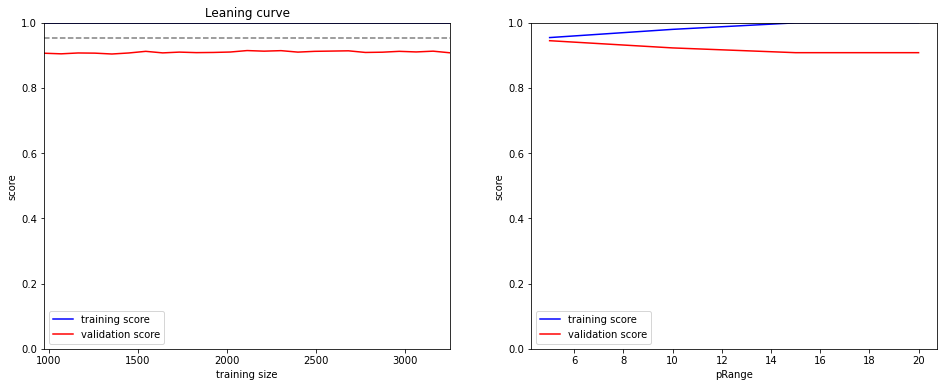

RandomForestClassifier-stdScaler
score on train data with RandomForestClassifier-stdScaler  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-stdScaler  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-stdScaler )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
---------------------------------------------------

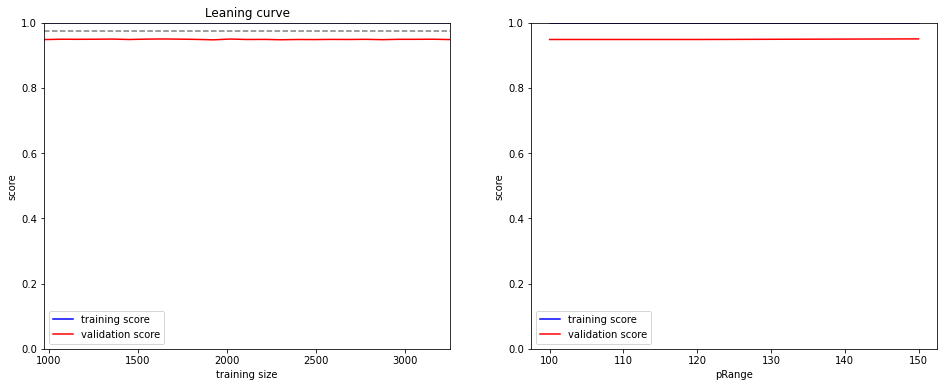

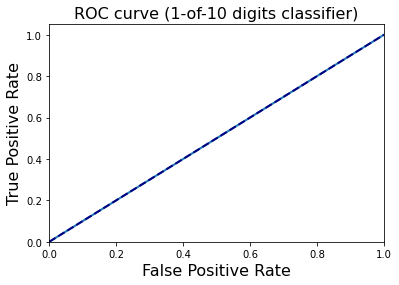

AdaBoostClassifier-stdScaler
score on train data with AdaBoostClassifier-stdScaler  : 0.9515279241306639
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-stdScaler  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-stdScaler )

            Not one     One 
    Not one  1205.0     1.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4995854063018242
-----------------------------------

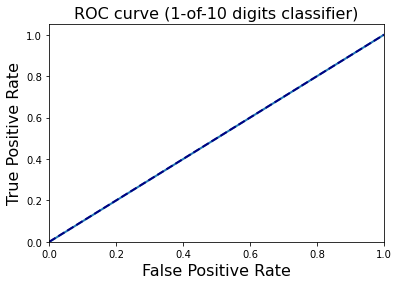

In [88]:
models('DummyClassifier-stdScaler',DummyClassifier(strategy = 'most_frequent'),x_train_scaled,y_train,x_test_scaled,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-stdScaler',LogisticRegression(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,LogisticRegression(),'C',[1,7])
models('knn-stdScaler',KNeighborsClassifier(),x_train_scaled,y_train,x_test_scaled,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-stdScaler',GaussianNB(),x_train_scaled,y_train,x_test_scaled,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-stdScaler',SVC(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-stdScaler',DecisionTreeClassifier(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-stdScaler',RandomForestClassifier(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-stdScaler',AdaBoostClassifier(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

let's try min max scaler


In [90]:
from sklearn.preprocessing import MinMaxScaler

In [91]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

DummyClassifier-minmaxScaler
score on train data with DummyClassifier-minmaxScaler  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-minmaxScaler  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-minmaxScaler )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
----------------------------------------------------

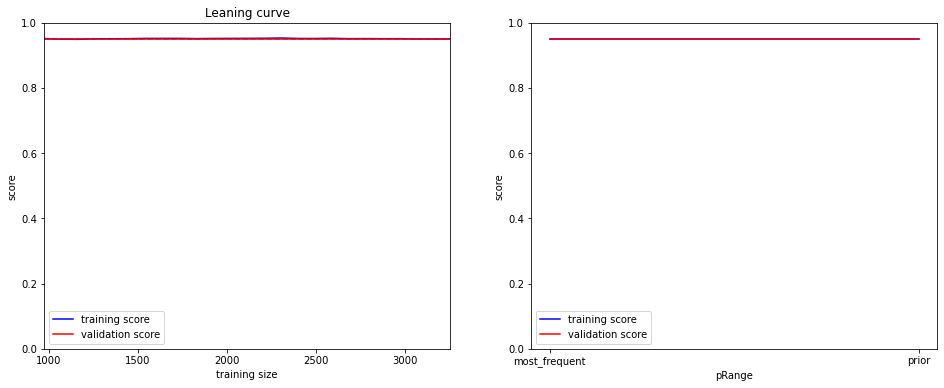

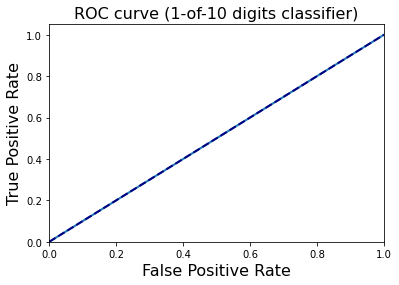

logistic regression-minmaxScaler
score on train data with logistic regression-minmaxScaler  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  logistic regression-minmaxScaler  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-minmaxScaler )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------------------

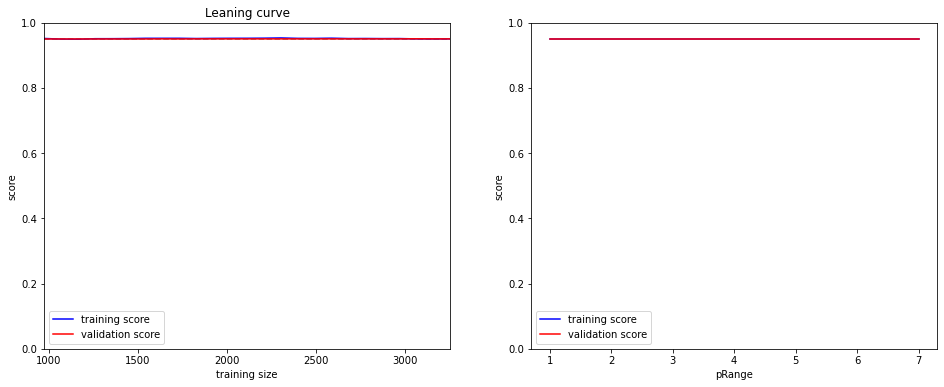

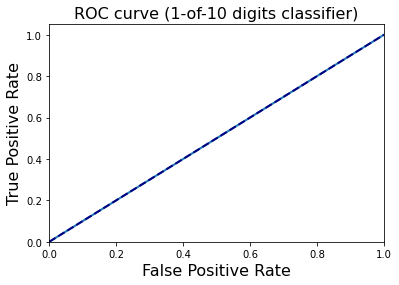

knn-minmaxScaler
score on train data with knn-minmaxScaler  : 0.9517913593256059
---------------------------------------------------------------------------------------
score on test data with  knn-minmaxScaler  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.5
---------------------------------------------------------------------------------------
recall:  0.05
---------------------------------------------------------------------------------------
Most frequent class ( knn-minmaxScaler )

            Not one     One 
    Not one  1203.0     3.0 
        One    57.0     3.0 
---------------------------------------------------------------------------------------
classification report:
 [[1203    3]
 [  57    3]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5237562189054726
------------------------------------------------------------------------------------

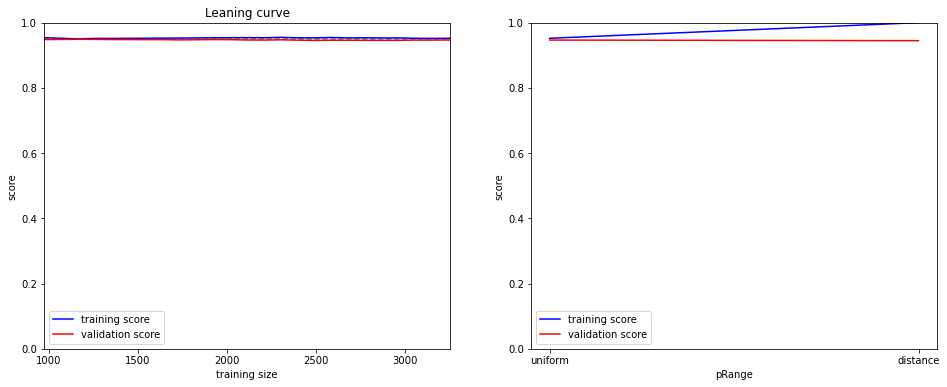

guassianNB-minmaxScaler
score on train data with guassianNB-minmaxScaler  : 0.18229715489989462
---------------------------------------------------------------------------------------
score on test data with  guassianNB-minmaxScaler  : 0.17614533965244866
---------------------------------------------------------------------------------------
preceision:  0.052775250227479524
---------------------------------------------------------------------------------------
recall:  0.9666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-minmaxScaler )

            Not one     One 
    Not one   165.0  1041.0 
        One     2.0    58.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 165 1041]
 [   2   58]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5517412935323383
---------------------

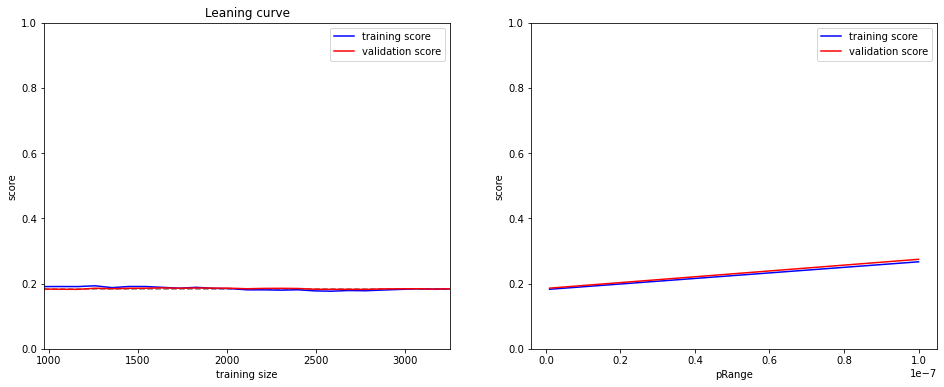

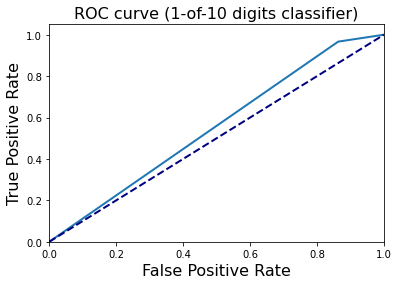

support vector machine-minmaxScaler
score on train data with support vector machine-minmaxScaler  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  support vector machine-minmaxScaler  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-minmaxScaler )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------

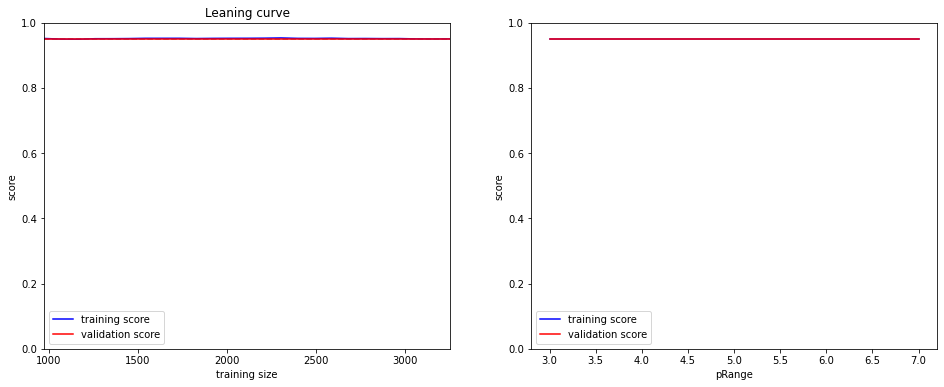

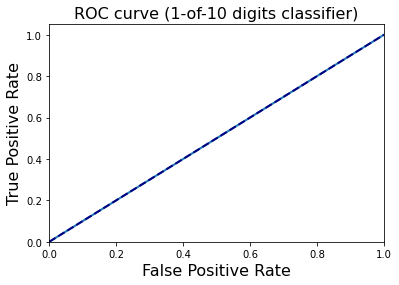

DecisionTree Classifier-minmaxScaler
score on train data with DecisionTree Classifier-minmaxScaler  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-minmaxScaler  : 0.9091627172195893
---------------------------------------------------------------------------------------
preceision:  0.11267605633802817
---------------------------------------------------------------------------------------
recall:  0.13333333333333333
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-minmaxScaler )

            Not one     One 
    Not one  1143.0    63.0 
        One    52.0     8.0 
---------------------------------------------------------------------------------------
classification report:
 [[1143   63]
 [  52    8]]
---------------------------------------------------------------------------------------
Test set AUC:  0.540

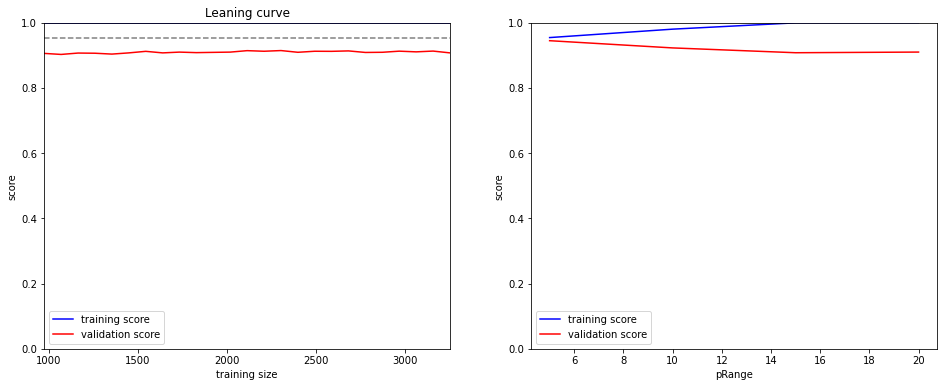

RandomForestClassifier-minmaxScaler
score on train data with RandomForestClassifier-minmaxScaler  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-minmaxScaler  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-minmaxScaler )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
---------------------------------------

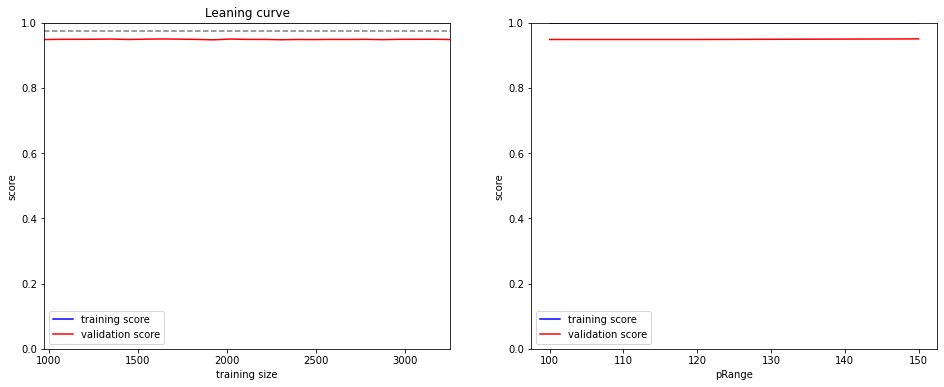

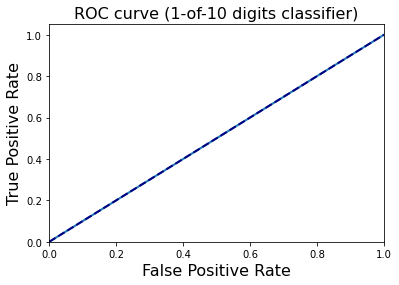

AdaBoostClassifier-minmaxScaler
score on train data with AdaBoostClassifier-minmaxScaler  : 0.9515279241306639
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-minmaxScaler  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-minmaxScaler )

            Not one     One 
    Not one  1205.0     1.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4995854063018242
-----------------------

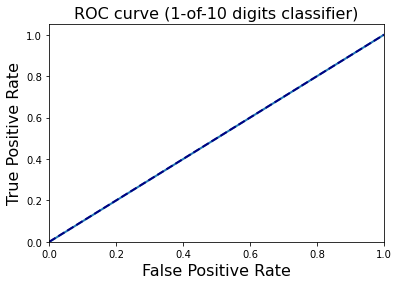

In [92]:
models('DummyClassifier-minmaxScaler',DummyClassifier(strategy = 'most_frequent'),x_train_scaled,y_train,x_test_scaled,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-minmaxScaler',LogisticRegression(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,LogisticRegression(),'C',[1,7])
models('knn-minmaxScaler',KNeighborsClassifier(),x_train_scaled,y_train,x_test_scaled,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-minmaxScaler',GaussianNB(),x_train_scaled,y_train,x_test_scaled,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-minmaxScaler',SVC(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-minmaxScaler',DecisionTreeClassifier(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-minmaxScaler',RandomForestClassifier(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-minmaxScaler',AdaBoostClassifier(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

In [ ]:
from sklearn.preprocessing import RobustScaler

In [ ]:
scaler = RobustScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [ ]:
models('DummyClassifier-robustScaler',DummyClassifier(strategy = 'most_frequent'),x_train_scaled,y_train,x_test_scaled,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-robustScaler',LogisticRegression(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,LogisticRegression(),'C',[1,7])
models('knn-robustScaler',KNeighborsClassifier(),x_train_scaled,y_train,x_test_scaled,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-robustScaler',GaussianNB(),x_train_scaled,y_train,x_test_scaled,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-robustScaler',SVC(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-robustScaler',DecisionTreeClassifier(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-robustScaler',RandomForestClassifier(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-robustScaler',AdaBoostClassifier(random_state=0),x_train_scaled,y_train,x_test_scaled,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

DummyClassifier
score on train data with DummyClassifier  : 0.9519832985386222
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
logistic regression
score on train data with logistic regression  : 0.9519832985386222
---------------------------------------------------------------------------------------
score on test data with  logistic 

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

support vector machine
score on train data with support vector machine  : 0.9519832985386222
---------------------------------------------------------------------------------------
score on test data with  support vector machine  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
DecisionTree Classifier
score on train data with DecisionTree Classifier  : 1.0
---------------------------------------------------------------------------------------
score on test

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: Undefine

RandomForestClassifier
score on train data with RandomForestClassifier  : 0.9997390396659708
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier  : 0.9491392801251957
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier )

            Not one     One 
    Not one  1213.0     0.0 
        One    65.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1213    0]
 [  65    0]]
AdaBoostClassifier
score on train data with AdaBoostClassifier  : 0.9527661795407099
---------------------------------------------------------------------------------------
score on

In [93]:
results1 = results

let's try feature selection and try it agein

1. select percentile

In [94]:
def scale(scale_type,x_train,x_test):
  scaler = scale_type
  scaler.fit(x_train)
  x_train_scaled = scaler.transform(x_train)
  x_test_scaled = scaler.transform(x_test)
  print("X_train.shape: {}".format(x_train_scaled.shape))
  print("X_train_selected.shape: {}".format(x_train_scaled.shape))
  return x_train_scaled ,x_test_scaled


In [95]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [96]:
from sklearn.feature_selection import SelectPercentile
select = SelectPercentile(percentile=50)
select.fit(x_train_scaled, y_train)
x_train_selected = select.transform(x_train_scaled)
x_test_selected = select.transform(x_test_scaled)
print("X_train.shape: {}".format(x_train_scaled.shape))
print("X_train_selected.shape: {}".format(x_train_selected.shape))

X_train.shape: (3796, 18)
X_train_selected.shape: (3796, 9)


In [97]:
mask = select.get_support()
plt.matshow(mask.reshape(1, -1), cmap='gray_r')
plt.xlabel("Sample index")
plt.yticks(())

([], [])

let's try in our model to see if get better or not

DummyClassifier-percentileFSelect
score on train data with DummyClassifier-percentileFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-percentileFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-percentileFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
--------------------------------

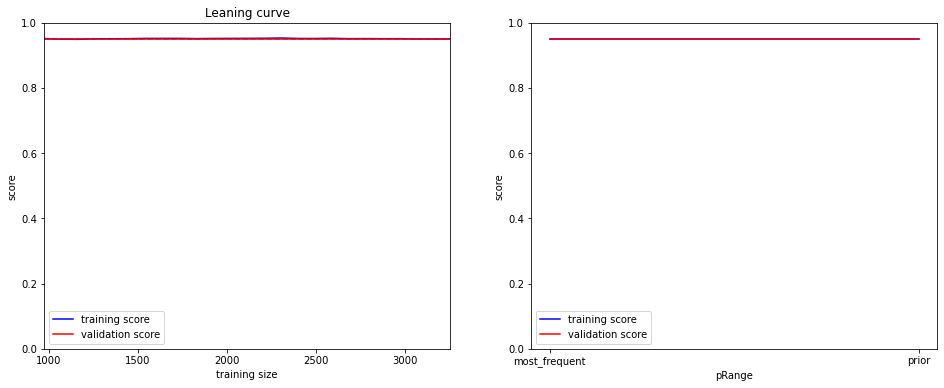

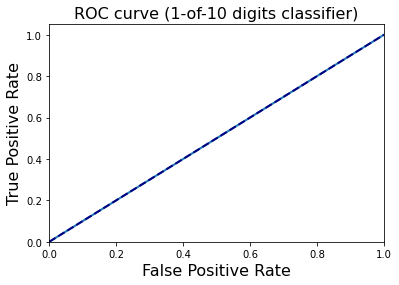

logistic regression-percentileFSelect
score on train data with logistic regression-percentileFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  logistic regression-percentileFSelect  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-percentileFSelect )

            Not one     One 
    Not one  1205.0     1.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4995854063018242

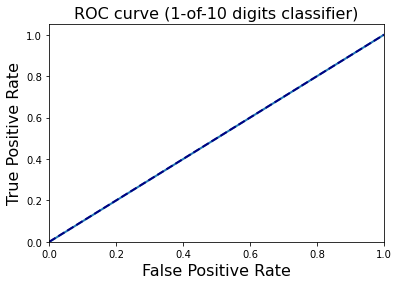

knn-percentileFSelect
score on train data with knn-percentileFSelect  : 0.952845100105374
---------------------------------------------------------------------------------------
score on test data with  knn-percentileFSelect  : 0.9510268562401264
---------------------------------------------------------------------------------------
preceision:  0.375
---------------------------------------------------------------------------------------
recall:  0.05
---------------------------------------------------------------------------------------
Most frequent class ( knn-percentileFSelect )

            Not one     One 
    Not one  1201.0     5.0 
        One    57.0     3.0 
---------------------------------------------------------------------------------------
classification report:
 [[1201    5]
 [  57    3]]
---------------------------------------------------------------------------------------
Test set AUC:  0.522927031509121
--------------------------------------------------------------

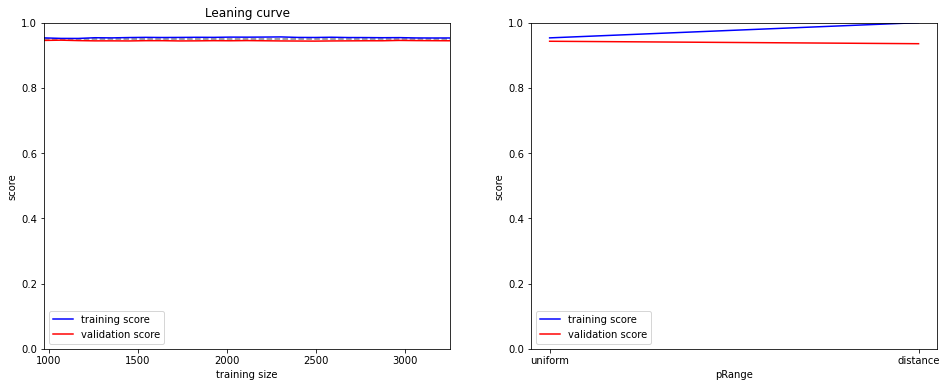

guassianNB-percentileFSelect
score on train data with guassianNB-percentileFSelect  : 0.33456269757639623
---------------------------------------------------------------------------------------
score on test data with  guassianNB-percentileFSelect  : 0.34913112164297
---------------------------------------------------------------------------------------
preceision:  0.0659090909090909
---------------------------------------------------------------------------------------
recall:  0.9666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-percentileFSelect )

            Not one     One 
    Not one   384.0   822.0 
        One     2.0    58.0 
---------------------------------------------------------------------------------------
classification report:
 [[384 822]
 [  2  58]]
---------------------------------------------------------------------------------------
Test set AUC:  0.6425373134328358
----------

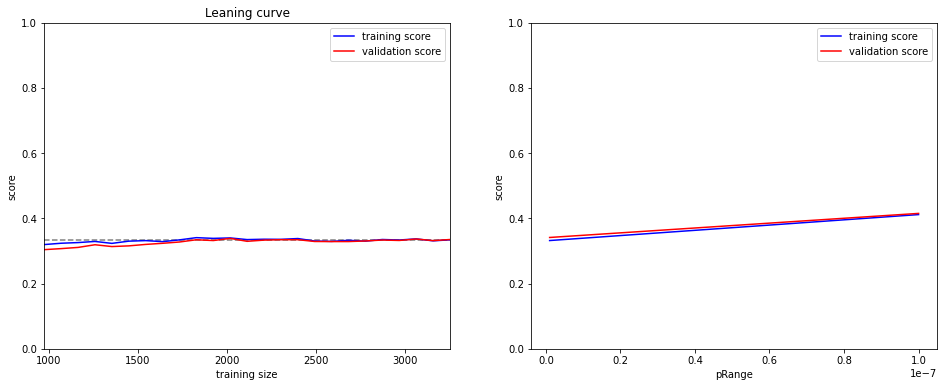

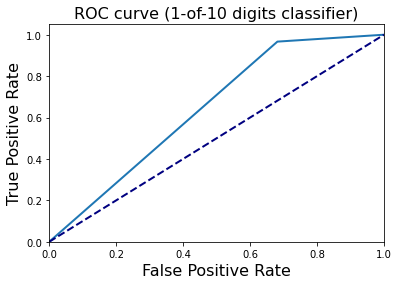

support vector machine-percentileFSelect
score on train data with support vector machine-percentileFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  support vector machine-percentileFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-percentileFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
----

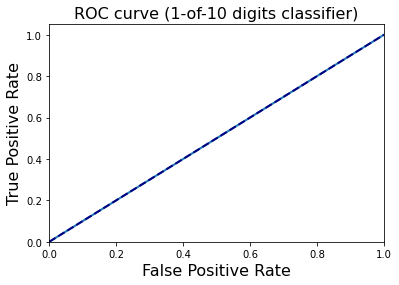

DecisionTree Classifier-percentileFSelect
score on train data with DecisionTree Classifier-percentileFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-percentileFSelect  : 0.9202211690363349
---------------------------------------------------------------------------------------
preceision:  0.12727272727272726
---------------------------------------------------------------------------------------
recall:  0.11666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-percentileFSelect )

            Not one     One 
    Not one  1158.0    48.0 
        One    53.0     7.0 
---------------------------------------------------------------------------------------
classification report:
 [[1158   48]
 [  53    7]]
---------------------------------------------------------------------------------------


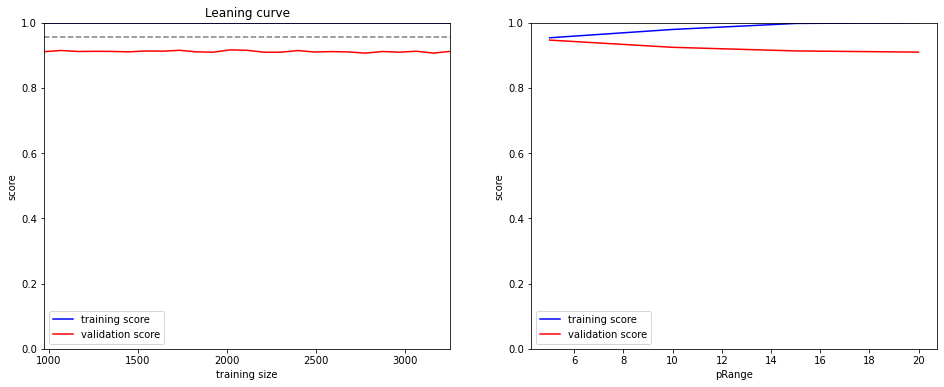

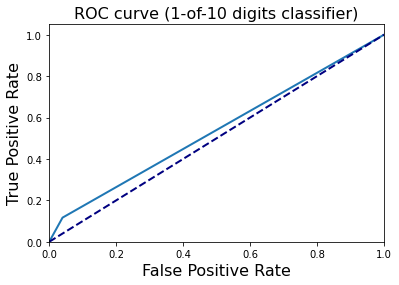

RandomForestClassifier-percentileFSelect
score on train data with RandomForestClassifier-percentileFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-percentileFSelect  : 0.9454976303317536
---------------------------------------------------------------------------------------
preceision:  0.09090909090909091
---------------------------------------------------------------------------------------
recall:  0.016666666666666666
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-percentileFSelect )

            Not one     One 
    Not one  1196.0    10.0 
        One    59.0     1.0 
---------------------------------------------------------------------------------------
classification report:
 [[1196   10]
 [  59    1]]
---------------------------------------------------------------------------------------
Tes

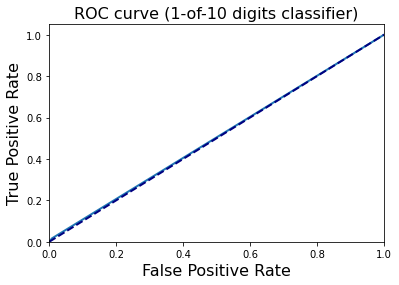

AdaBoostClassifier-percentileFSelect
score on train data with AdaBoostClassifier-percentileFSelect  : 0.9507376185458377
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-percentileFSelect  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-percentileFSelect )

            Not one     One 
    Not one  1205.0     1.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4995854063018242
---

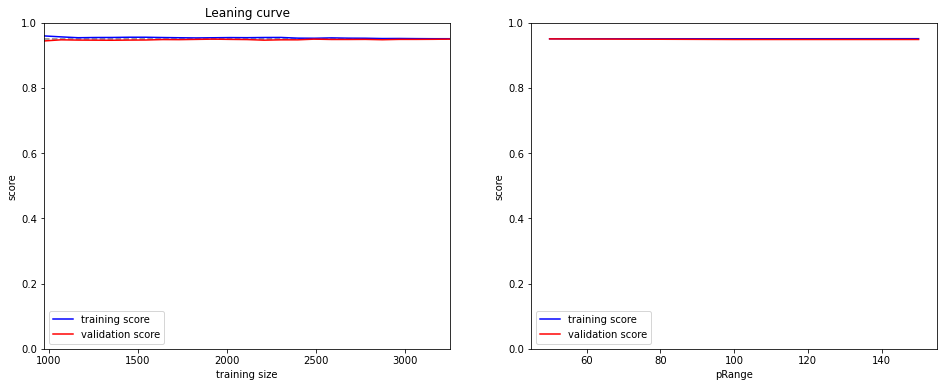

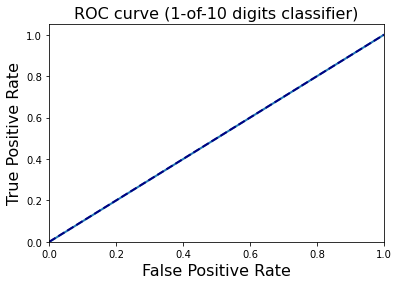

In [98]:
models('DummyClassifier-percentileFSelect',DummyClassifier(strategy = 'most_frequent'),x_train_selected,y_train,x_test_selected,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-percentileFSelect',LogisticRegression(random_state=0),x_train_selected,y_train,x_test_selected,y_test,LogisticRegression(),'C',[1,7])
models('knn-percentileFSelect',KNeighborsClassifier(),x_train_selected,y_train,x_test_selected,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-percentileFSelect',GaussianNB(),x_train_selected,y_train,x_test_selected,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-percentileFSelect',SVC(random_state=0),x_train_selected,y_train,x_test_selected,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-percentileFSelect',DecisionTreeClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-percentileFSelect',RandomForestClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-percentileFSelect',AdaBoostClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

2. select kbest


In [99]:
from sklearn.feature_selection import SelectKBest, chi2

In [100]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [101]:
### feature selection before scale
select = SelectKBest(chi2,k=9)
select.fit(x_train_scaled, y_train)
x_train_selected = select.transform(x_train_scaled)
x_test_selected = select.transform(x_test_scaled)
print("X_train.shape: {}".format(x_train_scaled.shape))
print("X_train_selected.shape: {}".format(x_train_selected.shape))

X_train.shape: (3796, 18)
X_train_selected.shape: (3796, 9)


DummyClassifier-kbestFSelect
score on train data with DummyClassifier-kbestFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-kbestFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-kbestFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
----------------------------------------------------

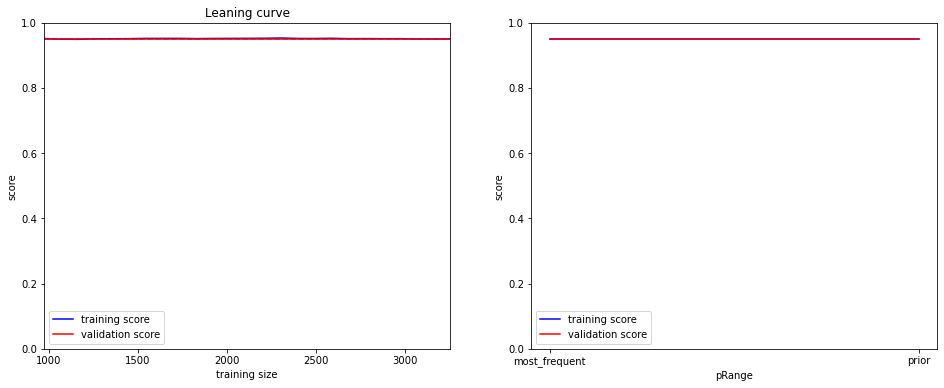

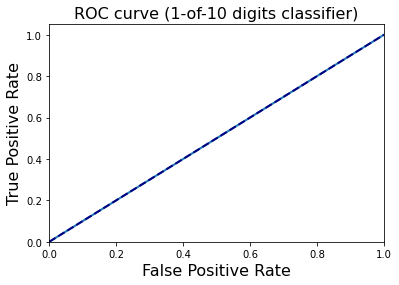

logistic regression-kbestFSelect
score on train data with logistic regression-kbestFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  logistic regression-kbestFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-kbestFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------------------

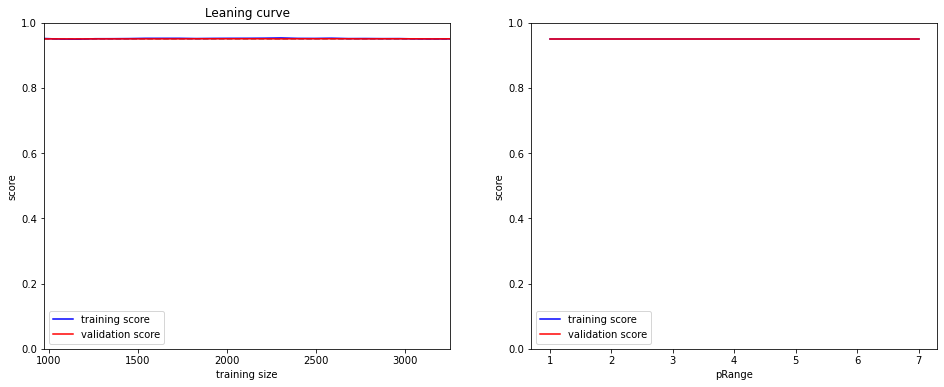

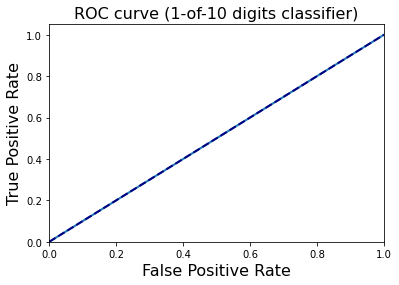

knn-kbestFSelect
score on train data with knn-kbestFSelect  : 0.9533719704952581
---------------------------------------------------------------------------------------
score on test data with  knn-kbestFSelect  : 0.9502369668246445
---------------------------------------------------------------------------------------
preceision:  0.3333333333333333
---------------------------------------------------------------------------------------
recall:  0.05
---------------------------------------------------------------------------------------
Most frequent class ( knn-kbestFSelect )

            Not one     One 
    Not one  1200.0     6.0 
        One    57.0     3.0 
---------------------------------------------------------------------------------------
classification report:
 [[1200    6]
 [  57    3]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5225124378109454
-------------------------------------------------------------------

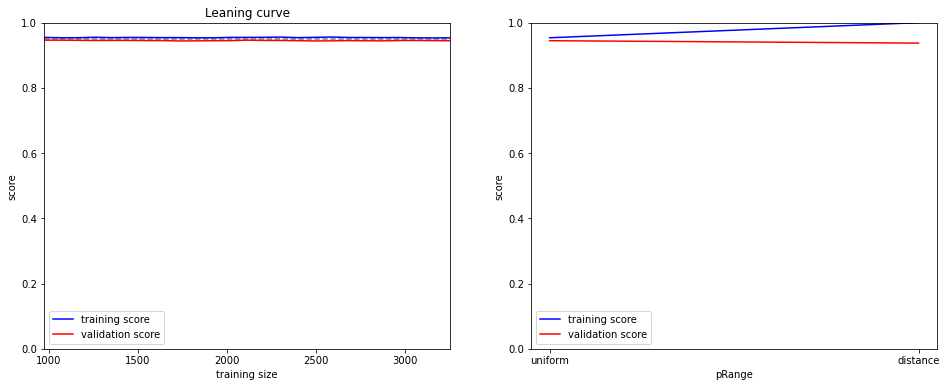

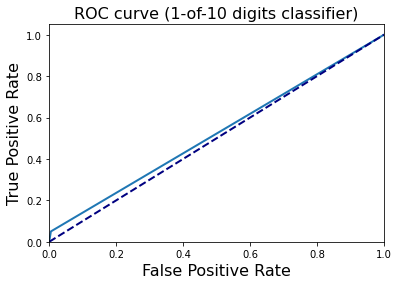

guassianNB-kbestFSelect
score on train data with guassianNB-kbestFSelect  : 0.34272918861959956
---------------------------------------------------------------------------------------
score on test data with  guassianNB-kbestFSelect  : 0.353870458135861
---------------------------------------------------------------------------------------
preceision:  0.06636155606407322
---------------------------------------------------------------------------------------
recall:  0.9666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-kbestFSelect )

            Not one     One 
    Not one   390.0   816.0 
        One     2.0    58.0 
---------------------------------------------------------------------------------------
classification report:
 [[390 816]
 [  2  58]]
---------------------------------------------------------------------------------------
Test set AUC:  0.6450248756218906
----------------------------

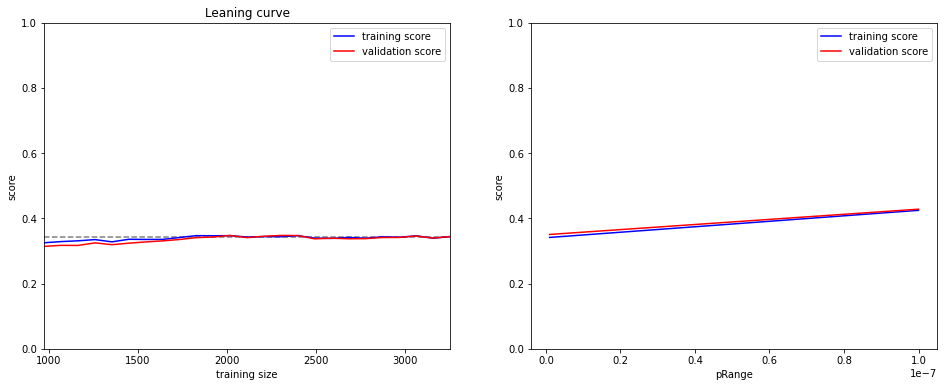

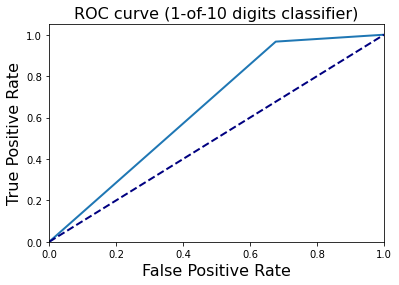

support vector machine-kbestFSelect
score on train data with support vector machine-kbestFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  support vector machine-kbestFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-kbestFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------

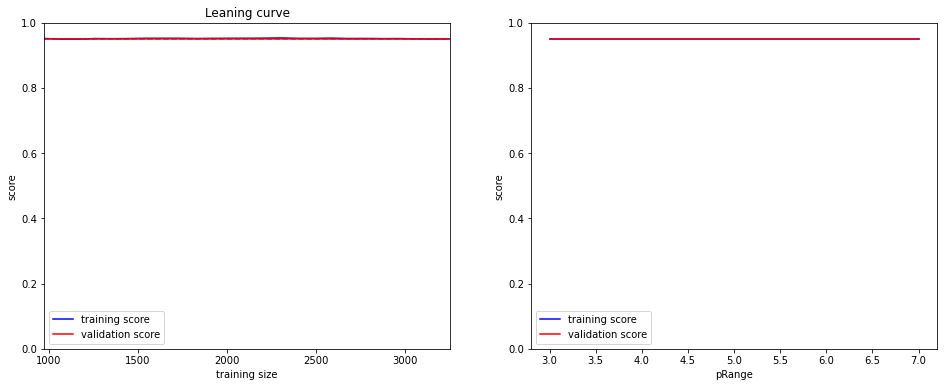

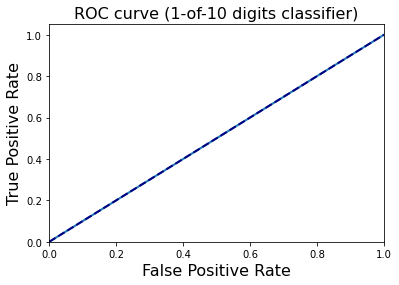

DecisionTree Classifier-kbestFSelect
score on train data with DecisionTree Classifier-kbestFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-kbestFSelect  : 0.9210110584518167
---------------------------------------------------------------------------------------
preceision:  0.14285714285714285
---------------------------------------------------------------------------------------
recall:  0.13333333333333333
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-kbestFSelect )

            Not one     One 
    Not one  1158.0    48.0 
        One    52.0     8.0 
---------------------------------------------------------------------------------------
classification report:
 [[1158   48]
 [  52    8]]
---------------------------------------------------------------------------------------
Test set AUC:  0.546

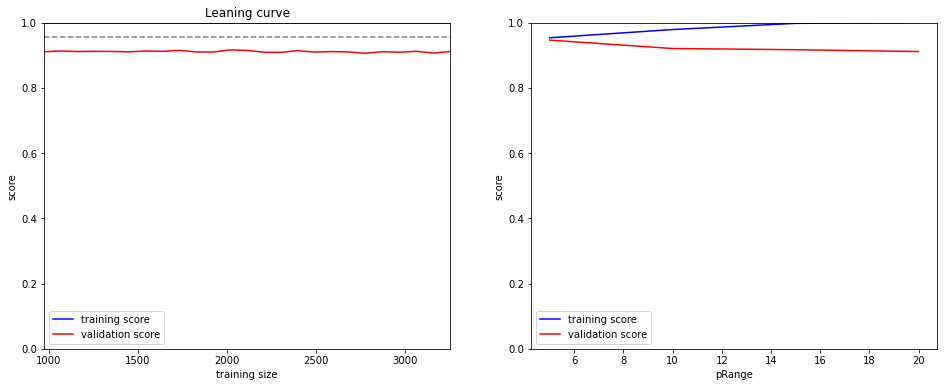

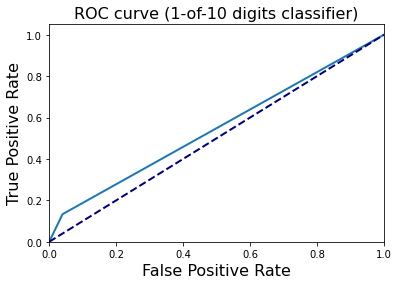

RandomForestClassifier-kbestFSelect
score on train data with RandomForestClassifier-kbestFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-kbestFSelect  : 0.9454976303317536
---------------------------------------------------------------------------------------
preceision:  0.09090909090909091
---------------------------------------------------------------------------------------
recall:  0.016666666666666666
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-kbestFSelect )

            Not one     One 
    Not one  1196.0    10.0 
        One    59.0     1.0 
---------------------------------------------------------------------------------------
classification report:
 [[1196   10]
 [  59    1]]
---------------------------------------------------------------------------------------
Test set AUC:  0.504187

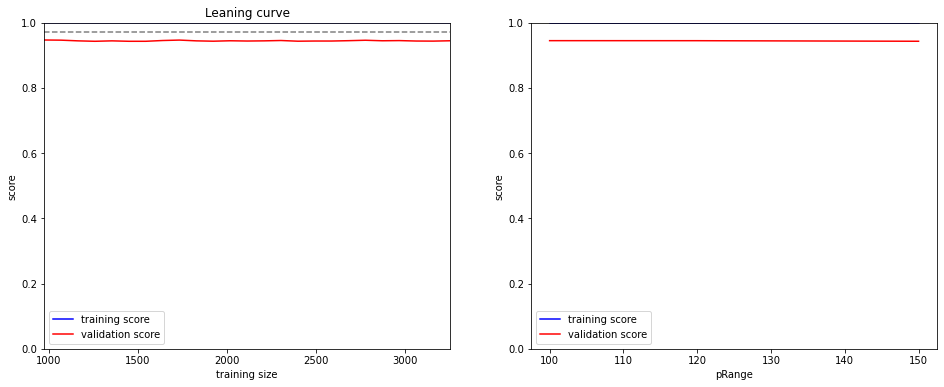

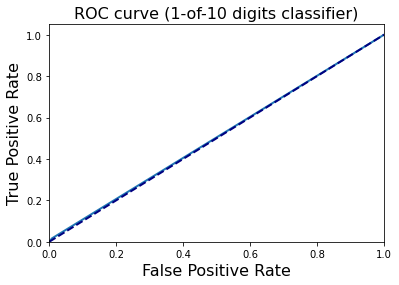

AdaBoostClassifier-kbestFSelect
score on train data with AdaBoostClassifier-kbestFSelect  : 0.9507376185458377
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-kbestFSelect  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-kbestFSelect )

            Not one     One 
    Not one  1205.0     1.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4995854063018242
-----------------------

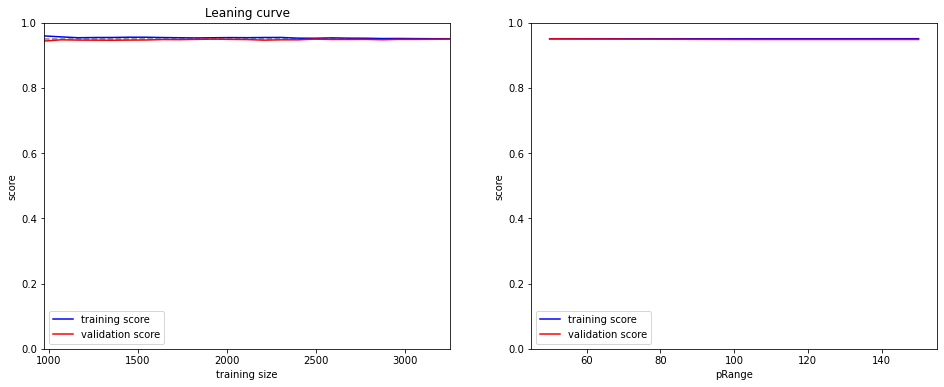

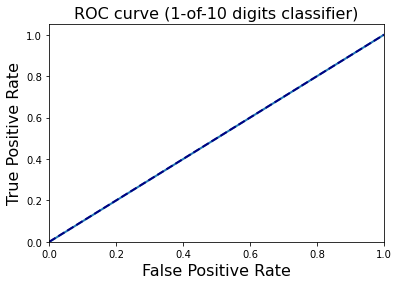

In [102]:
models('DummyClassifier-kbestFSelect',DummyClassifier(strategy = 'most_frequent'),x_train_selected,y_train,x_test_selected,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-kbestFSelect',LogisticRegression(random_state=0),x_train_selected,y_train,x_test_selected,y_test,LogisticRegression(),'C',[1,7])
models('knn-kbestFSelect',KNeighborsClassifier(),x_train_selected,y_train,x_test_selected,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-kbestFSelect',GaussianNB(),x_train_selected,y_train,x_test_selected,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-kbestFSelect',SVC(random_state=0),x_train_selected,y_train,x_test_selected,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-kbestFSelect',DecisionTreeClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-kbestFSelect',RandomForestClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-kbestFSelect',AdaBoostClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

In [103]:
from sklearn.feature_selection import GenericUnivariateSelect, chi2

In [104]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [105]:
select = GenericUnivariateSelect(chi2, mode='k_best', param=10)
select.fit(x_train_scaled, y_train)
x_train_selected = select.transform(x_train_scaled)
x_test_selected = select.transform(x_test_scaled)
print("X_train.shape: {}".format(x_train_scaled.shape))
print("X_train_selected.shape: {}".format(x_train_selected.shape))

X_train.shape: (3796, 18)
X_train_selected.shape: (3796, 10)


DummyClassifier-genericFSelect
score on train data with DummyClassifier-genericFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-genericFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-genericFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
--------------------------------------------

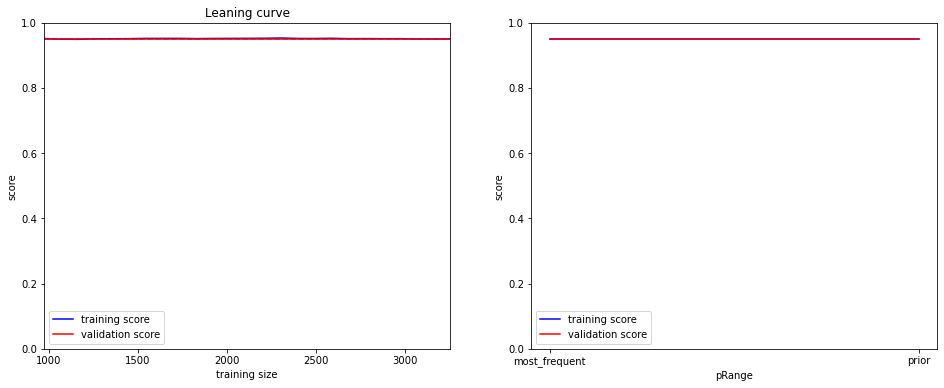

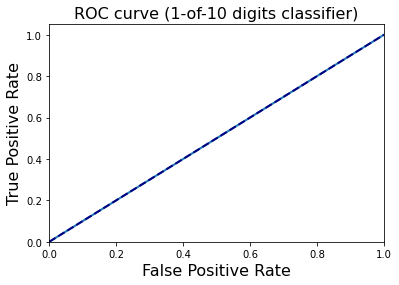

logistic regression-genericFSelect
score on train data with logistic regression-genericFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  logistic regression-genericFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-genericFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
----------------------------

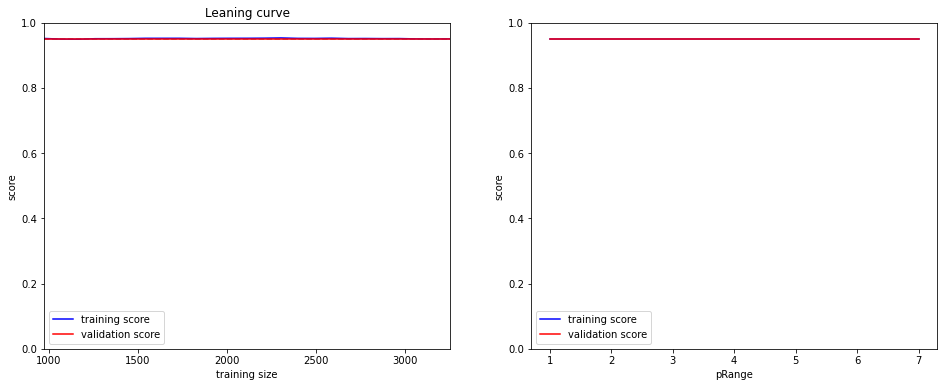

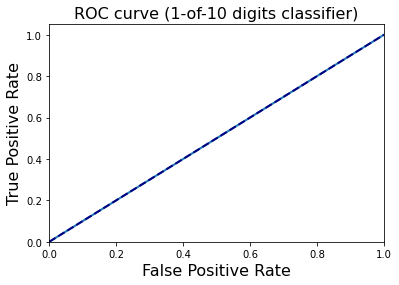

knn-genericFSelect
score on train data with knn-genericFSelect  : 0.9544257112750263
---------------------------------------------------------------------------------------
score on test data with  knn-genericFSelect  : 0.9502369668246445
---------------------------------------------------------------------------------------
preceision:  0.3333333333333333
---------------------------------------------------------------------------------------
recall:  0.05
---------------------------------------------------------------------------------------
Most frequent class ( knn-genericFSelect )

            Not one     One 
    Not one  1200.0     6.0 
        One    57.0     3.0 
---------------------------------------------------------------------------------------
classification report:
 [[1200    6]
 [  57    3]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5225124378109454
-----------------------------------------------------------

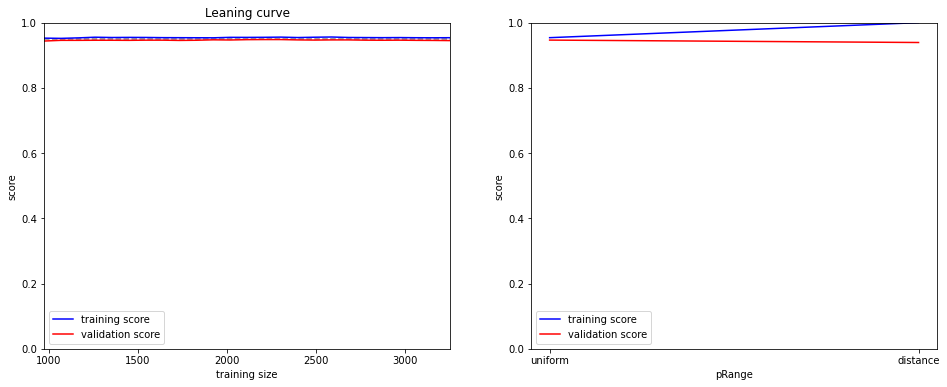

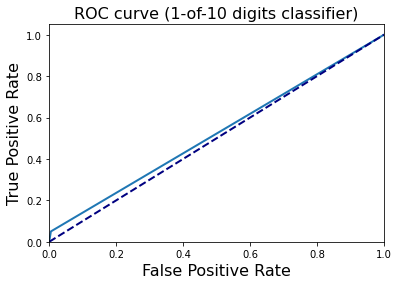

guassianNB-genericFSelect
score on train data with guassianNB-genericFSelect  : 0.3432560590094837
---------------------------------------------------------------------------------------
score on test data with  guassianNB-genericFSelect  : 0.3546603475513428
---------------------------------------------------------------------------------------
preceision:  0.06643757159221077
---------------------------------------------------------------------------------------
recall:  0.9666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-genericFSelect )

            Not one     One 
    Not one   391.0   815.0 
        One     2.0    58.0 
---------------------------------------------------------------------------------------
classification report:
 [[391 815]
 [  2  58]]
---------------------------------------------------------------------------------------
Test set AUC:  0.6454394693200664
--------------------

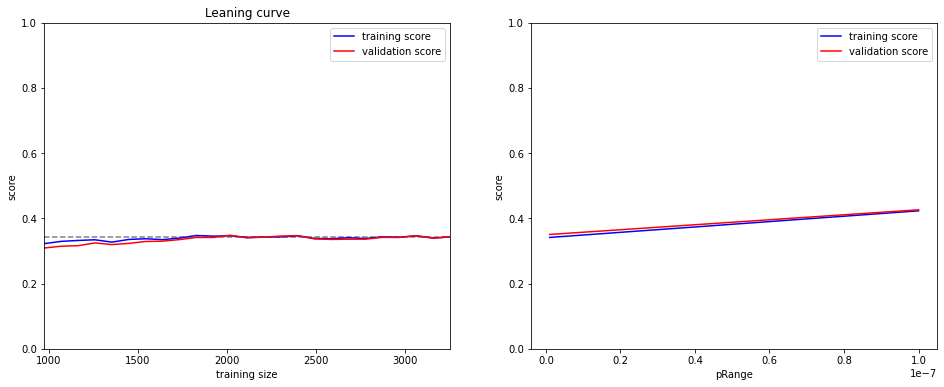

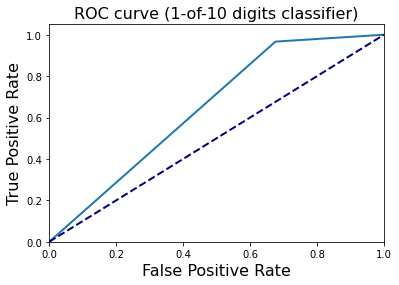

support vector machine-genericFSelect
score on train data with support vector machine-genericFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  support vector machine-genericFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-genericFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
----------------

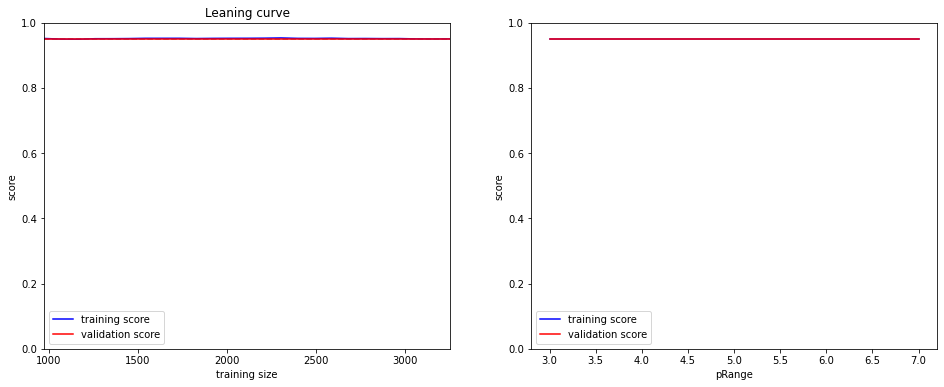

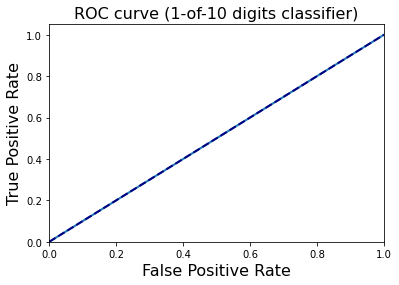

DecisionTree Classifier-genericFSelect
score on train data with DecisionTree Classifier-genericFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-genericFSelect  : 0.919431279620853
---------------------------------------------------------------------------------------
preceision:  0.09615384615384616
---------------------------------------------------------------------------------------
recall:  0.08333333333333333
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-genericFSelect )

            Not one     One 
    Not one  1159.0    47.0 
        One    55.0     5.0 
---------------------------------------------------------------------------------------
classification report:
 [[1159   47]
 [  55    5]]
---------------------------------------------------------------------------------------
Test set AUC:

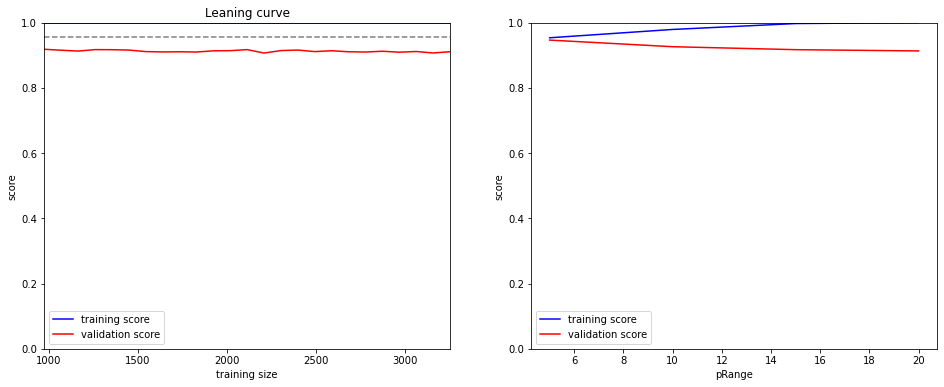

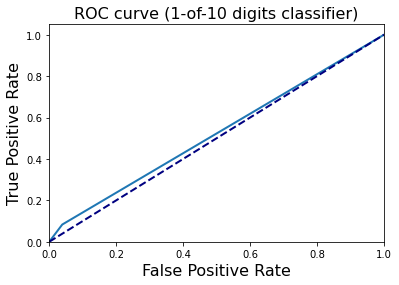

RandomForestClassifier-genericFSelect
score on train data with RandomForestClassifier-genericFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-genericFSelect  : 0.9454976303317536
---------------------------------------------------------------------------------------
preceision:  0.15384615384615385
---------------------------------------------------------------------------------------
recall:  0.03333333333333333
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-genericFSelect )

            Not one     One 
    Not one  1195.0    11.0 
        One    58.0     2.0 
---------------------------------------------------------------------------------------
classification report:
 [[1195   11]
 [  58    2]]
---------------------------------------------------------------------------------------
Test set AUC:  0

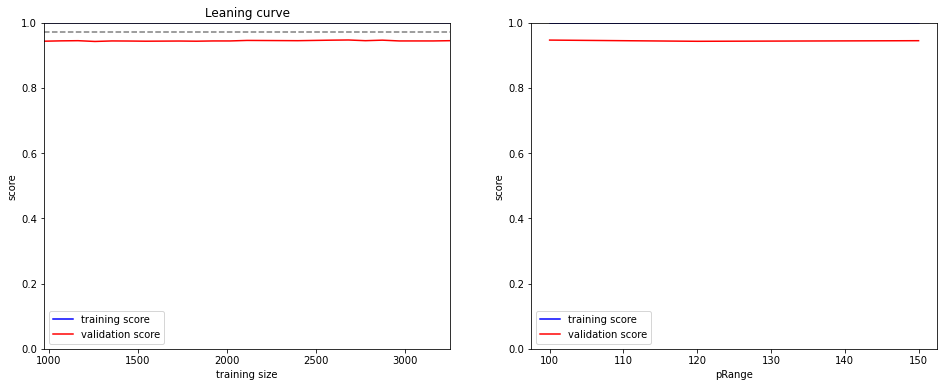

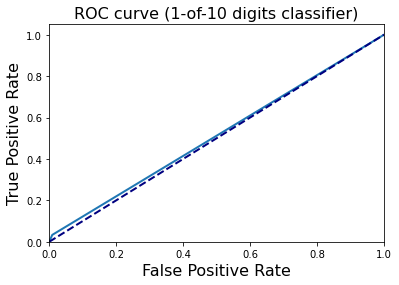

AdaBoostClassifier-genericFSelect
score on train data with AdaBoostClassifier-genericFSelect  : 0.9507376185458377
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-genericFSelect  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-genericFSelect )

            Not one     One 
    Not one  1205.0     1.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4995854063018242
---------------

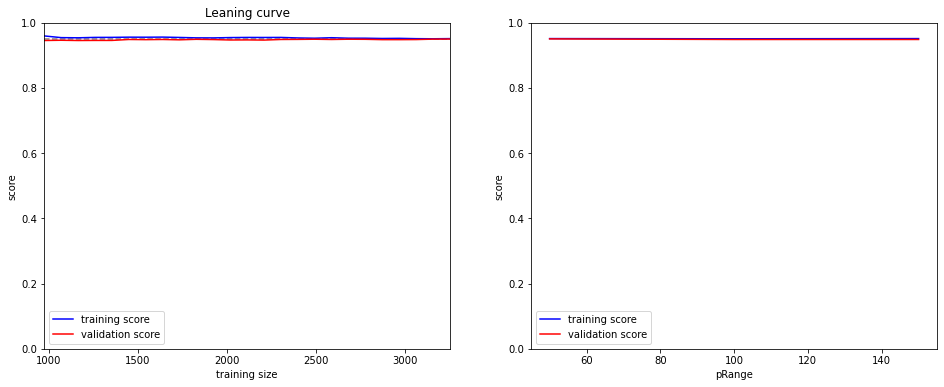

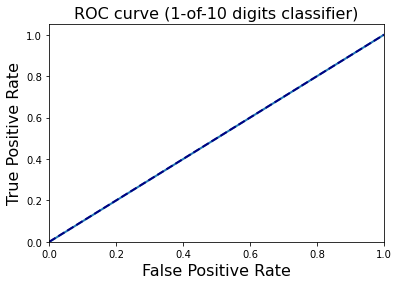

In [106]:
models('DummyClassifier-genericFSelect',DummyClassifier(strategy = 'most_frequent'),x_train_selected,y_train,x_test_selected,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-genericFSelect',LogisticRegression(random_state=0),x_train_selected,y_train,x_test_selected,y_test,LogisticRegression(),'C',[1,7])
models('knn-genericFSelect',KNeighborsClassifier(),x_train_selected,y_train,x_test_selected,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-genericFSelect',GaussianNB(),x_train_selected,y_train,x_test_selected,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-genericFSelect',SVC(random_state=0),x_train_selected,y_train,x_test_selected,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-genericFSelect',DecisionTreeClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-genericFSelect',RandomForestClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-genericFSelect',AdaBoostClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

In [107]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

In [108]:
select.fit(x_train_scaled, y_train)
x_train_selected = select.transform(x_train_scaled)
x_test_selected = select.transform(x_test_scaled)
print("X_train.shape: {}".format(x_train_scaled.shape))
print("X_train_l1.shape: {}".format(x_train_scaled.shape))

X_train.shape: (3796, 18)
X_train_l1.shape: (3796, 18)


DummyClassifier-modelFSelect
score on train data with DummyClassifier-modelFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-modelFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-modelFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
----------------------------------------------------

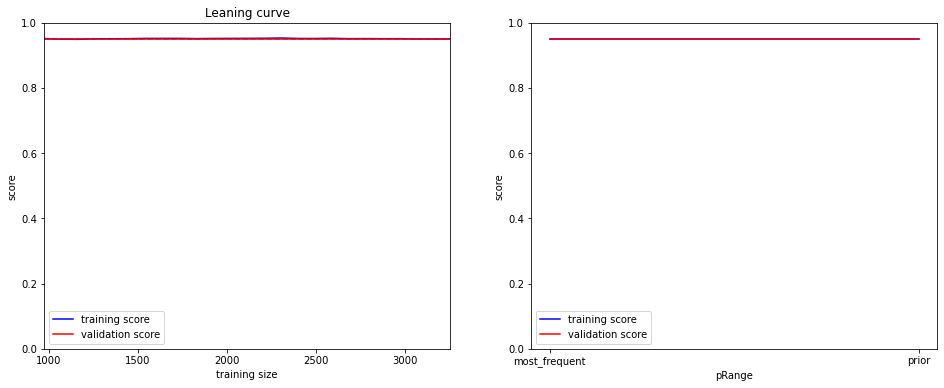

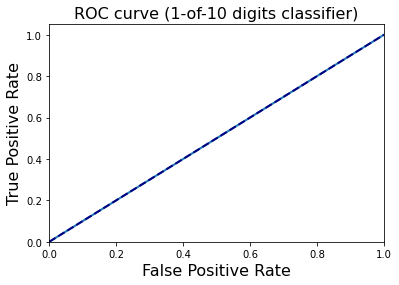

logistic regression-modelFSelect
score on train data with logistic regression-modelFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  logistic regression-modelFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-modelFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------------------

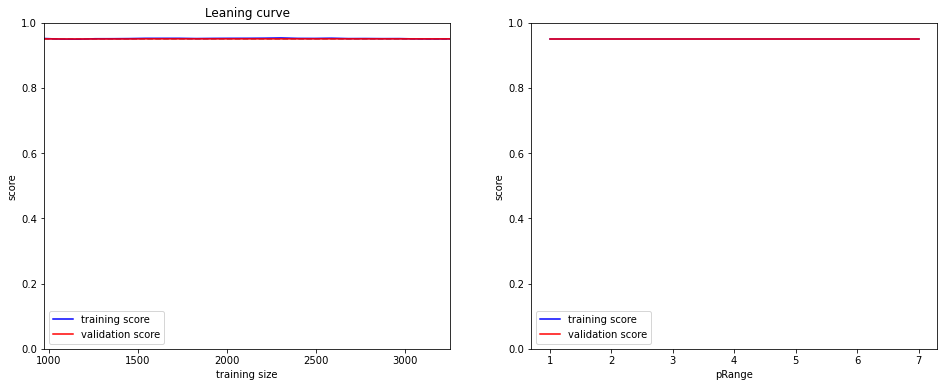

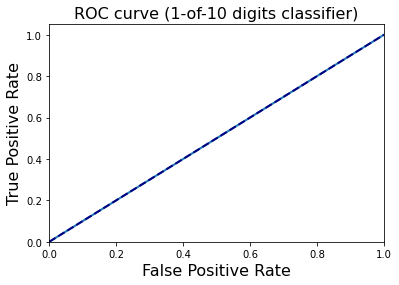

knn-modelFSelect
score on train data with knn-modelFSelect  : 0.9512644889357218
---------------------------------------------------------------------------------------
score on test data with  knn-modelFSelect  : 0.9478672985781991
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( knn-modelFSelect )

            Not one     One 
    Not one  1200.0     6.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1200    6]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4975124378109453
-----------------------------------------------------------------------------------

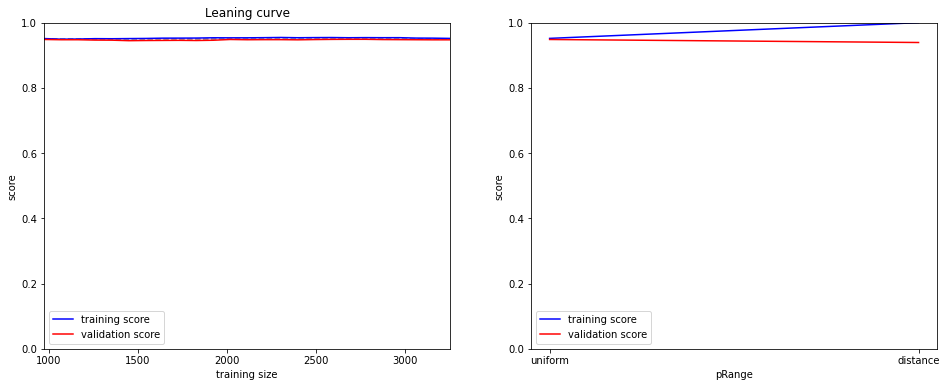

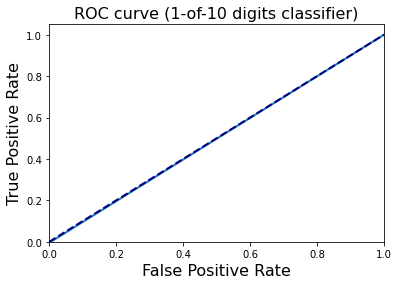

guassianNB-modelFSelect
score on train data with guassianNB-modelFSelect  : 0.8717070600632244
---------------------------------------------------------------------------------------
score on test data with  guassianNB-modelFSelect  : 0.8783570300157978
---------------------------------------------------------------------------------------
preceision:  0.18666666666666668
---------------------------------------------------------------------------------------
recall:  0.4666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-modelFSelect )

            Not one     One 
    Not one  1084.0   122.0 
        One    32.0    28.0 
---------------------------------------------------------------------------------------
classification report:
 [[1084  122]
 [  32   28]]
---------------------------------------------------------------------------------------
Test set AUC:  0.6827529021558872
------------------------

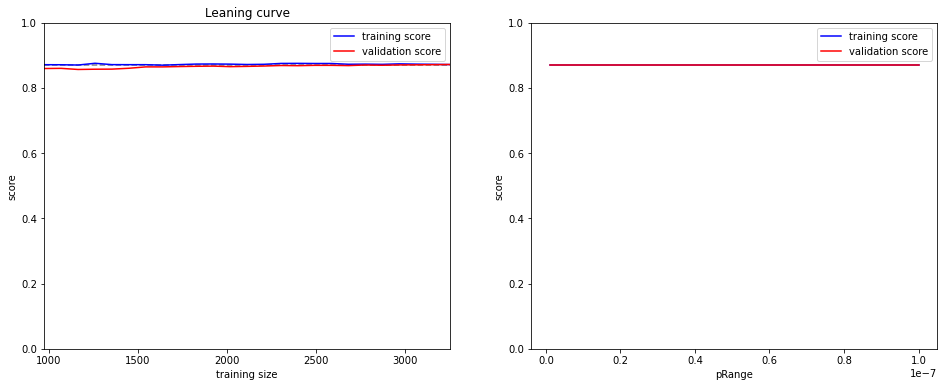

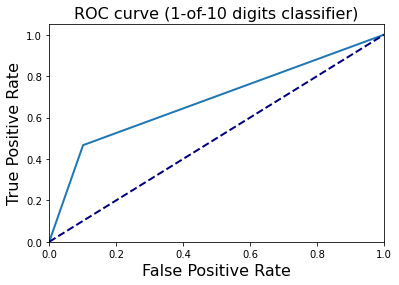

support vector machine-modelFSelect
score on train data with support vector machine-modelFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  support vector machine-modelFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-modelFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------

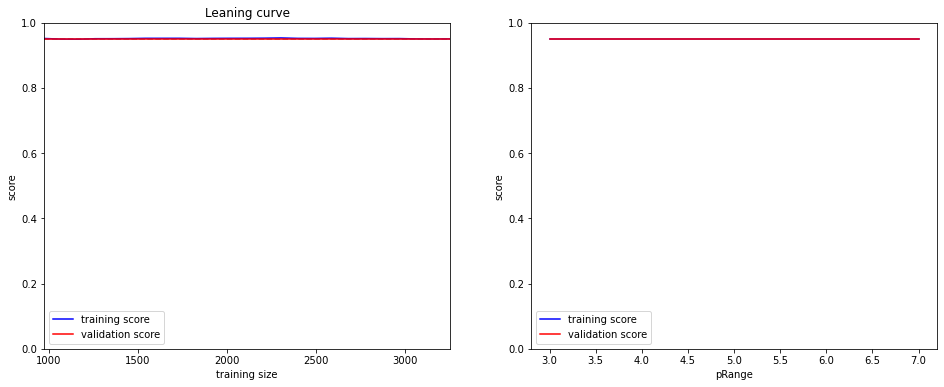

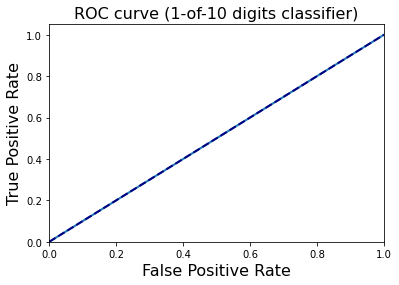

DecisionTree Classifier-modelFSelect
score on train data with DecisionTree Classifier-modelFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-modelFSelect  : 0.909952606635071
---------------------------------------------------------------------------------------
preceision:  0.10294117647058823
---------------------------------------------------------------------------------------
recall:  0.11666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-modelFSelect )

            Not one     One 
    Not one  1145.0    61.0 
        One    53.0     7.0 
---------------------------------------------------------------------------------------
classification report:
 [[1145   61]
 [  53    7]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5330

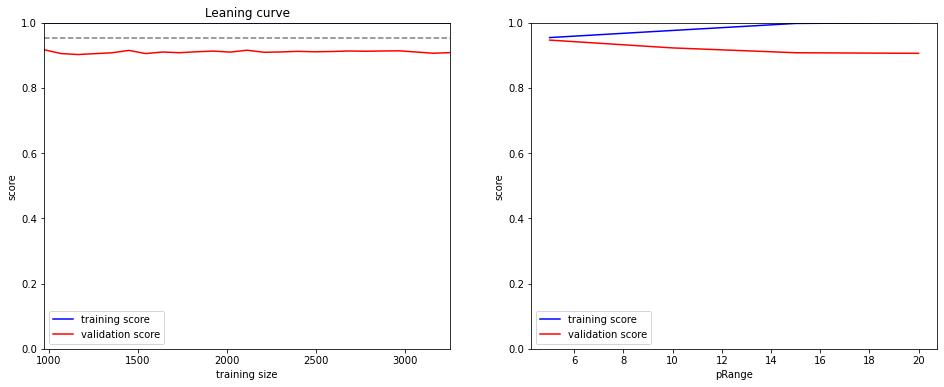

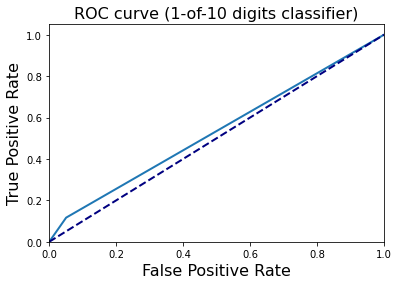

RandomForestClassifier-modelFSelect
score on train data with RandomForestClassifier-modelFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-modelFSelect  : 0.9494470774091627
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-modelFSelect )

            Not one     One 
    Not one  1202.0     4.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1202    4]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.49834162520729686
---------------------

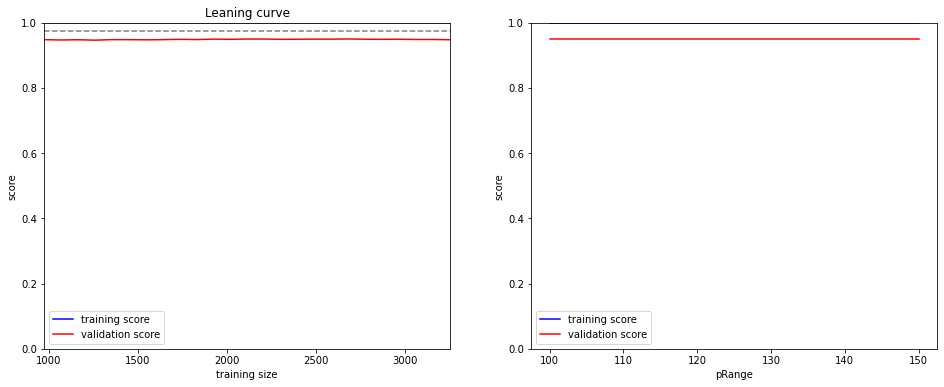

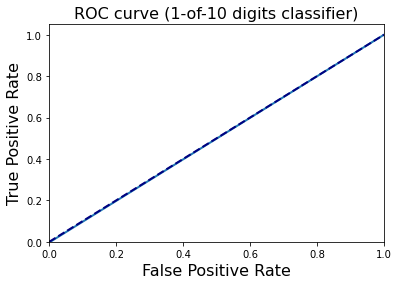

AdaBoostClassifier-modelFSelect
score on train data with AdaBoostClassifier-modelFSelect  : 0.9507376185458377
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-modelFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.5
---------------------------------------------------------------------------------------
recall:  0.016666666666666666
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-modelFSelect )

            Not one     One 
    Not one  1205.0     1.0 
        One    59.0     1.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  59    1]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5079187396351574
--------

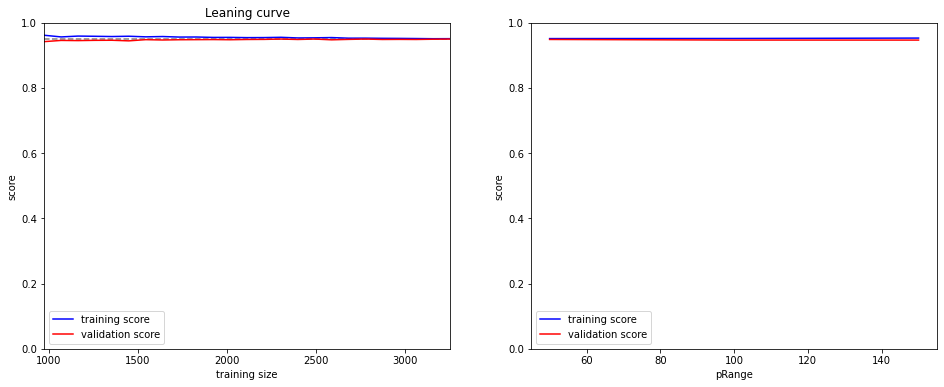

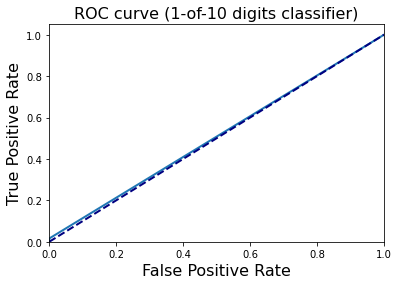

In [109]:
models('DummyClassifier-modelFSelect',DummyClassifier(strategy = 'most_frequent'),x_train_selected,y_train,x_test_selected,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-modelFSelect',LogisticRegression(random_state=0),x_train_selected,y_train,x_test_selected,y_test,LogisticRegression(),'C',[1,7])
models('knn-modelFSelect',KNeighborsClassifier(),x_train_selected,y_train,x_test_selected,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-modelFSelect',GaussianNB(),x_train_selected,y_train,x_test_selected,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-modelFSelect',SVC(random_state=0),x_train_selected,y_train,x_test_selected,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-modelFSelect',DecisionTreeClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-modelFSelect',RandomForestClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-modelFSelect',AdaBoostClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

In [110]:
from sklearn.feature_selection import RFE
select = RFE(RandomForestClassifier(n_estimators=100, random_state=42),
             n_features_to_select=40)

In [111]:
select.fit(x_train_scaled, y_train)
x_train_selected = select.transform(x_train_scaled)
x_test_selected = select.transform(x_test_scaled)

DummyClassifier-rfeFSelect
score on train data with DummyClassifier-rfeFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  DummyClassifier-rfeFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( DummyClassifier-rfeFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
------------------------------------------------------------

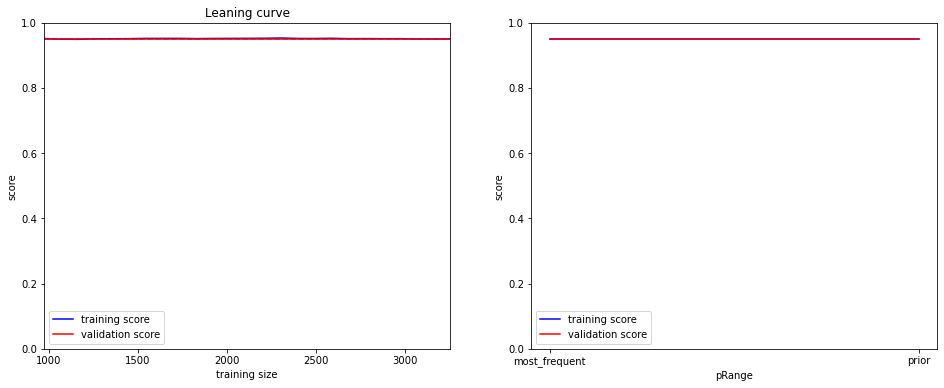

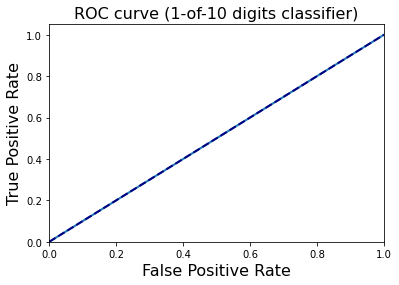

logistic regression-rfeFSelect
score on train data with logistic regression-rfeFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  logistic regression-rfeFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( logistic regression-rfeFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
--------------------------------------------

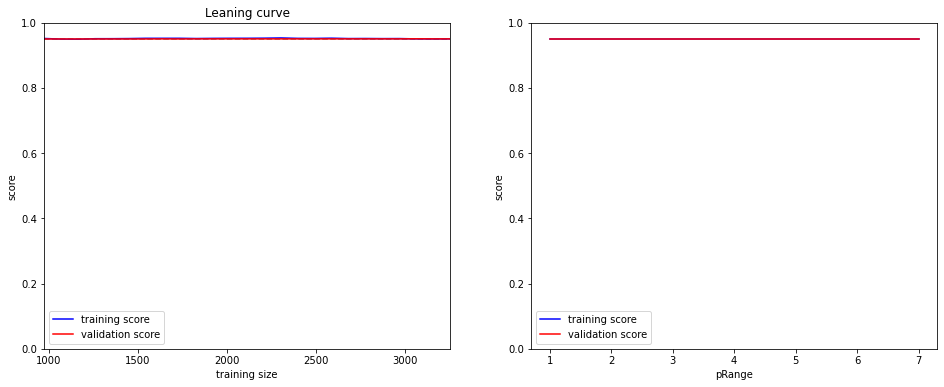

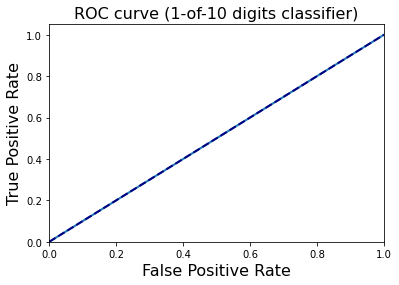

knn-rfeFSelect
score on train data with knn-rfeFSelect  : 0.9517913593256059
---------------------------------------------------------------------------------------
score on test data with  knn-rfeFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.5
---------------------------------------------------------------------------------------
recall:  0.05
---------------------------------------------------------------------------------------
Most frequent class ( knn-rfeFSelect )

            Not one     One 
    Not one  1203.0     3.0 
        One    57.0     3.0 
---------------------------------------------------------------------------------------
classification report:
 [[1203    3]
 [  57    3]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5237562189054726
---------------------------------------------------------------------------------------
F1: 

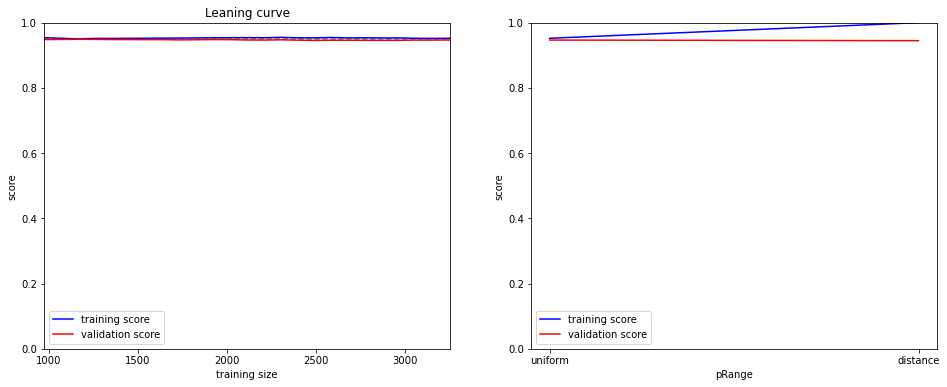

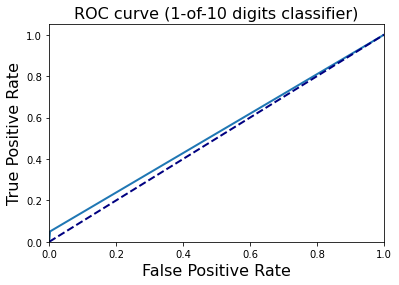

guassianNB-rfeFSelect
score on train data with guassianNB-rfeFSelect  : 0.18229715489989462
---------------------------------------------------------------------------------------
score on test data with  guassianNB-rfeFSelect  : 0.17614533965244866
---------------------------------------------------------------------------------------
preceision:  0.052775250227479524
---------------------------------------------------------------------------------------
recall:  0.9666666666666667
---------------------------------------------------------------------------------------
Most frequent class ( guassianNB-rfeFSelect )

            Not one     One 
    Not one   165.0  1041.0 
        One     2.0    58.0 
---------------------------------------------------------------------------------------
classification report:
 [[ 165 1041]
 [   2   58]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5517412935323383
-----------------------------

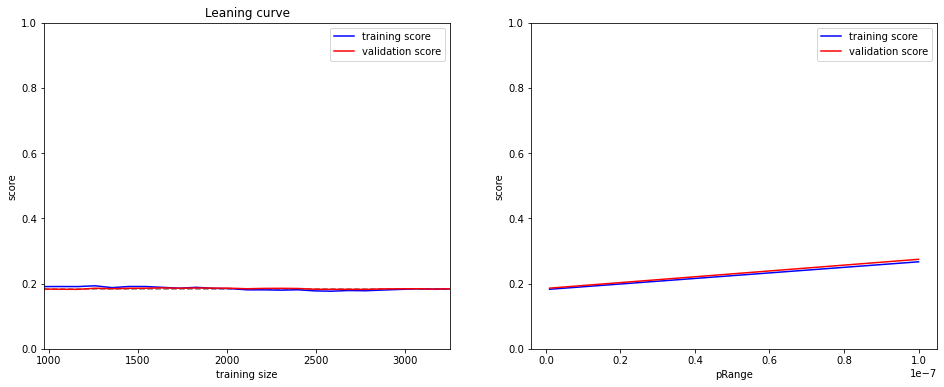

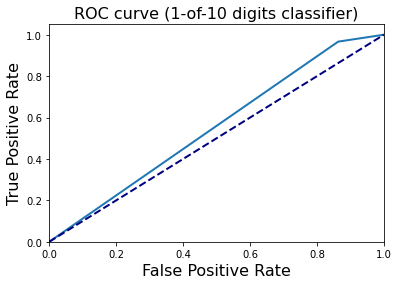

support vector machine-rfeFSelect
score on train data with support vector machine-rfeFSelect  : 0.9502107481559536
---------------------------------------------------------------------------------------
score on test data with  support vector machine-rfeFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( support vector machine-rfeFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
--------------------------------

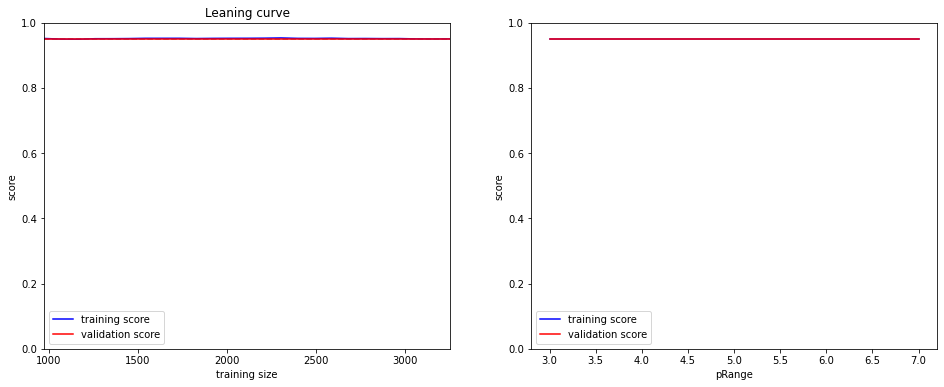

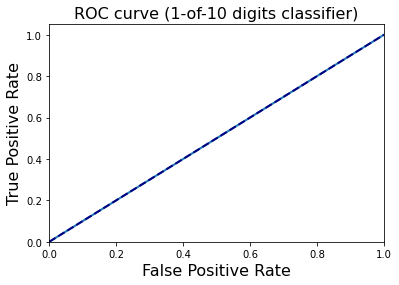

DecisionTree Classifier-rfeFSelect
score on train data with DecisionTree Classifier-rfeFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  DecisionTree Classifier-rfeFSelect  : 0.9091627172195893
---------------------------------------------------------------------------------------
preceision:  0.11267605633802817
---------------------------------------------------------------------------------------
recall:  0.13333333333333333
---------------------------------------------------------------------------------------
Most frequent class ( DecisionTree Classifier-rfeFSelect )

            Not one     One 
    Not one  1143.0    63.0 
        One    52.0     8.0 
---------------------------------------------------------------------------------------
classification report:
 [[1143   63]
 [  52    8]]
---------------------------------------------------------------------------------------
Test set AUC:  0.54054726368

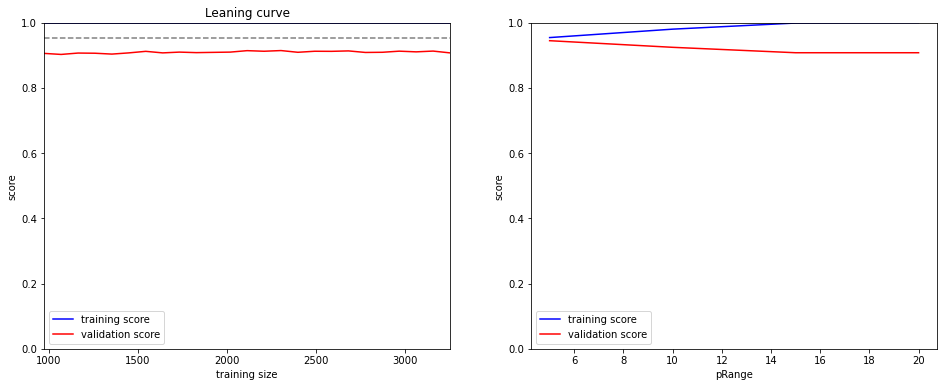

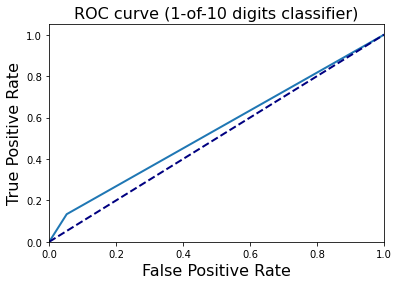

RandomForestClassifier-rfeFSelect
score on train data with RandomForestClassifier-rfeFSelect  : 1.0
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-rfeFSelect  : 0.95260663507109
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-rfeFSelect )

            Not one     One 
    Not one  1206.0     0.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1206    0]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.5
-----------------------------------------------

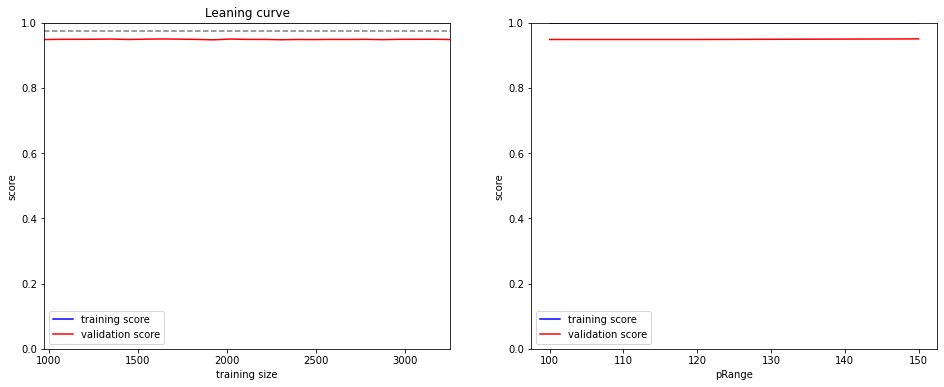

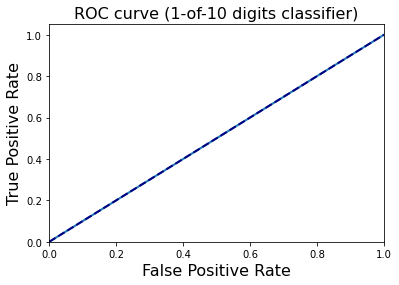

AdaBoostClassifier-rfeFSelect
score on train data with AdaBoostClassifier-rfeFSelect  : 0.9515279241306639
---------------------------------------------------------------------------------------
score on test data with  AdaBoostClassifier-rfeFSelect  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( AdaBoostClassifier-rfeFSelect )

            Not one     One 
    Not one  1205.0     1.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4995854063018242
-------------------------------

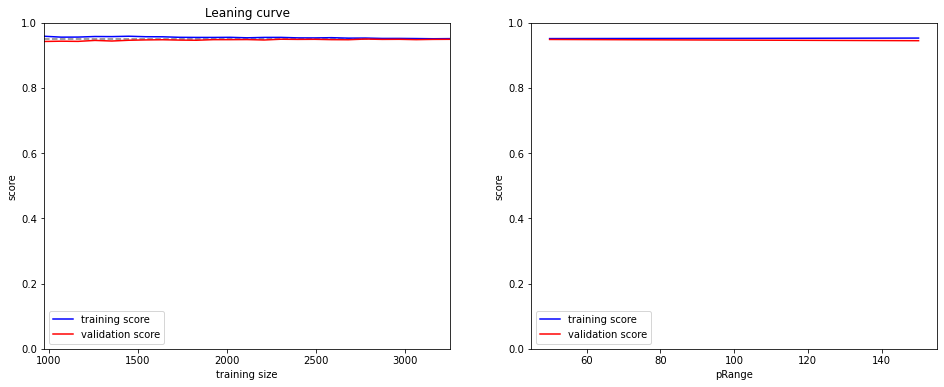

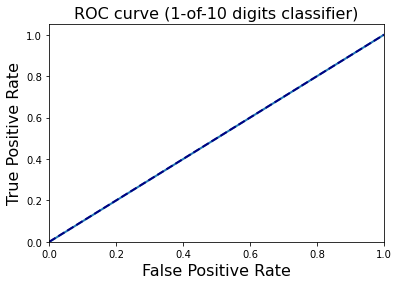

In [112]:
models('DummyClassifier-rfeFSelect',DummyClassifier(strategy = 'most_frequent'),x_train_selected,y_train,x_test_selected,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-rfeFSelect',LogisticRegression(random_state=0),x_train_selected,y_train,x_test_selected,y_test,LogisticRegression(),'C',[1,7])
models('knn-rfeFSelect',KNeighborsClassifier(),x_train_selected,y_train,x_test_selected,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-rfeFSelect',GaussianNB(),x_train_selected,y_train,x_test_selected,y_test,GaussianNB(),'var_smoothing',[1e-9,1e-7])
models('support vector machine-rfeFSelect',SVC(random_state=0),x_train_selected,y_train,x_test_selected,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-rfeFSelect',DecisionTreeClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-rfeFSelect',RandomForestClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
models('AdaBoostClassifier-rfeFSelect',AdaBoostClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

In [114]:
results2 = results

after feature selection the accuracy not get better 
let's try tuning the models

In [117]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA 

In [118]:
### try it on logistic regression
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree),LogisticRegression(max_iter =1000, solver ='liblinear',**kwargs))


param_grid = {'polynomialfeatures__degree': [2,3,4],
              'logisticregression__penalty': ['l1','l2'],
              'logisticregression__C': [0.01,0.1,1]}

grid = GridSearchCV(PolynomialRegression(), param_grid, cv=3)

In [ ]:
grid.fit(x_train_selected, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('logisticregression',
                                        LogisticRegression(max_iter=1000,
                                                           solver='liblinear'))]),
             param_grid={'logisticregression__C': [0.01, 0.1, 1],
                         'logisticregression__penalty': ['l1', 'l2'],
                         'polynomialfeatures__degree': [2, 3, 4]})

In [ ]:
grid.best_params_

{'logisticregression__C': 0.01,
 'logisticregression__penalty': 'l1',
 'polynomialfeatures__degree': 2}

In [ ]:
grid.best_score_

0.9519834281655011

2. knn

In [ ]:
knn = KNeighborsClassifier()
k_range = np.arange(1, 31, 1)
param_grid = dict(n_neighbors=k_range,metric=['euclidean', 'manhattan', 'chebyshev', 'minkowski'])
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')
grid.fit(x_train, y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'chebyshev',
                                    'minkowski'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30])},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'metric': 'euclidean', 'n_neighbors': 18}
0.9519840622280246


In [ ]:
nb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=nb_classifier, 
                 param_grid=params_NB,
                 cv =10,
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(x_train, y_train)

print(gs_NB.best_params_)
print(gs_NB.best_score_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
{'var_smoothing': 1.0}
0.9519840622280246


In [ ]:
svc = SVC()
parameters_svc = {'kernel':('linear', 'rbf'), 'C': [0.001, 0.01, 0.1, 1, 10, 100],'gamma':[0.001, 0.01, 0.05, 0.1, 1, 10, 100]}
grid_clf = GridSearchCV(svc, param_grid = parameters_svc)
grid_clf.fit(x_train_scaled,y_train)

KeyboardInterrupt: ignored

In [ ]:
print(grid_clf.best_params_)
print(grid_clf.best_score_)

{'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
0.9519834150891372


In [ ]:
dtc=DecisionTreeClassifier(random_state=42)
parameters = { 'criterion':['gini','entropy'],'max_depth': np.arange(3, 15),'max_leaf_nodes': list(range(2, 100))}
grid_clf = GridSearchCV(dtc, param_grid = parameters)
grid_clf.fit(x_train_scaled,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
                         'max_leaf_nodes': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                            13, 14, 15, 16, 17, 18, 19, 20, 21,
                                            22, 23, 24, 25, 26, 27, 28, 29, 30,
                                            31, ...]})

In [ ]:
print(grid_clf.best_params_)
print(grid_clf.best_score_)

{'criterion': 'gini', 'max_depth': 3, 'max_leaf_nodes': 2}
0.9519834150891372


In [ ]:
rf = RandomForestClassifier(random_state = 42)

In [ ]:
random_grid = {'n_estimators':[int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
               'max_features':['auto', 'sqrt', 'log2'],
               'max_depth': [4,5,6,7,8],
               'criterion' :['gini', 'entropy'],
               'min_samples_split':  [2, 5, 10],
               'min_samples_leaf': [1, 2, 4]}

In [ ]:
rf_random = GridSearchCV(estimator = rf,param_grid = random_grid ,cv = 3, verbose=2)

In [ ]:
rf_random.fit(x_train_scaled,y_train)

[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1400; total time=   3.1s
[CV] END criterion=gini, max_depth=4, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=1600; total time=   3.5s


KeyboardInterrupt: ignored

In [ ]:
print(rf_random.best_params_)
print(rf_random.best_score_)

In [ ]:
i = XGBClassifier()
j= {'learning_rate': [0.01, 0.05, 0.1], 'eval_metric': ['error']}
grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
grid.fit(x_train_scaled,y_train)

GridSearchCV(cv=10, estimator=XGBClassifier(),
             param_grid={'eval_metric': ['error'],
                         'learning_rate': [0.01, 0.05, 0.1]},
             scoring='accuracy')

In [ ]:
print(grid.best_params_)
print(grid.best_score_)

{'eval_metric': 'error', 'learning_rate': 0.05}
0.9519840622280246


{'mean_fit_time': array([0.43693099, 0.40101945, 0.39628828]),
 'mean_score_time': array([0.00220599, 0.00243676, 0.00263393]),
 'mean_test_score': array([0.95172297, 0.95198406, 0.95146255]),
 'param_eval_metric': masked_array(data=['error', 'error', 'error'],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'param_learning_rate': masked_array(data=[0.01, 0.05, 0.1],
              mask=[False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'eval_metric': 'error', 'learning_rate': 0.01},
  {'eval_metric': 'error', 'learning_rate': 0.05},
  {'eval_metric': 'error', 'learning_rate': 0.1}],
 'rank_test_score': array([2, 1, 3], dtype=int32),
 'split0_test_score': array([0.95052083, 0.95052083, 0.94791667]),
 'split1_test_score': array([0.95052083, 0.95052083, 0.95052083]),
 'split2_test_score': array([0.95300261, 0.95300261, 0.95300261]),
 'split3_test_score': array([0.95300261, 0.95300261, 0.95300261]),
 'split

In [ ]:
def findBestParameter(nameOftheClassifier,classifier,param_grid,cv,x_train,y_train,x_test,y_test):
  grid = GridSearchCV(classifier, param_grid, cv=3)
  grid.fit(x_train, y_train)
  y_decision_fn_scores_acc = grid.decision_function(x_test)
  print('Grid best parameter (max. accuracy): ', grid.best_params_)
  print('Grid best score (accuracy): ', grid.best_score_)

  # alternative metric to optimize over grid parameters: AUC
  grid_clf_auc = GridSearchCV(classifier, param_grid = param_grid, scoring = 'roc_auc')
  grid_clf_auc.fit(x_train, y_train)
  y_decision_fn_scores_auc = grid_clf_auc.decision_function(x_test) 
  print('Test set AUC: ', roc_auc_score(y_test, y_decision_fn_scores_auc))
  print('Grid best parameter (max. AUC): ', grid_clf_auc.best_params_)
  print('Grid best score (AUC): ', grid_clf_auc.best_score_)

In [ ]:
findBestParameter('svm',SVC(),parameters_svc,3,x_train_selected,y_train,x_test_selected,y_test)

Grid best parameter (max. accuracy):  {'C': 0.001, 'gamma': 0.001, 'kernel': 'linear'}
Grid best score (accuracy):  0.9519834281655011
Test set AUC:  0.6279789460333567
Grid best parameter (max. AUC):  {'C': 100, 'gamma': 0.05, 'kernel': 'rbf'}
Grid best score (AUC):  0.6975690810038856


In [ ]:
findBestParameter('lr',PolynomialRegression(), param_grid,3,x_train_selected,y_train,x_test_selected,y_test)

Grid best parameter (max. accuracy):  {'logisticregression__C': 0.01, 'logisticregression__penalty': 'l1', 'polynomialfeatures__degree': 2}
Grid best score (accuracy):  0.9519834281655011
Test set AUC:  0.8065508275730864
Grid best parameter (max. AUC):  {'logisticregression__C': 0.1, 'logisticregression__penalty': 'l1', 'polynomialfeatures__degree': 3}
Grid best score (AUC):  0.8428030630833776


RandomForestClassifier-grid
score on train data with RandomForestClassifier-grid  : 0.9549525816649105
---------------------------------------------------------------------------------------
score on test data with  RandomForestClassifier-grid  : 0.9518167456556083
---------------------------------------------------------------------------------------
preceision:  0.0
---------------------------------------------------------------------------------------
recall:  0.0
---------------------------------------------------------------------------------------
Most frequent class ( RandomForestClassifier-grid )

            Not one     One 
    Not one  1205.0     1.0 
        One    60.0     0.0 
---------------------------------------------------------------------------------------
classification report:
 [[1205    1]
 [  60    0]]
---------------------------------------------------------------------------------------
Test set AUC:  0.4995854063018242
---------------------------------------

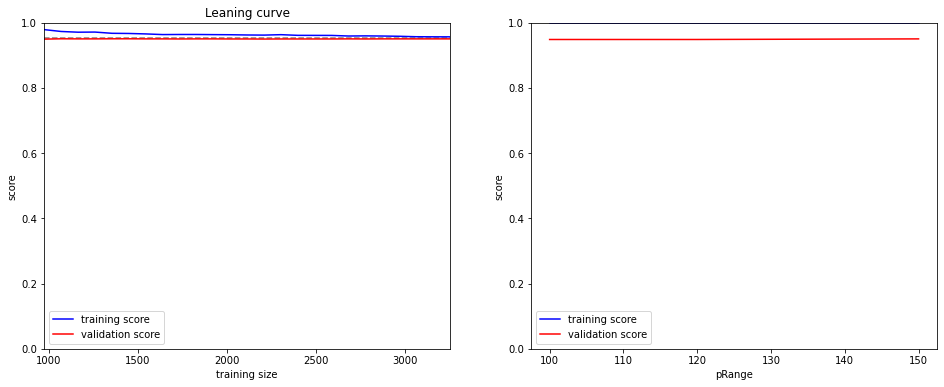

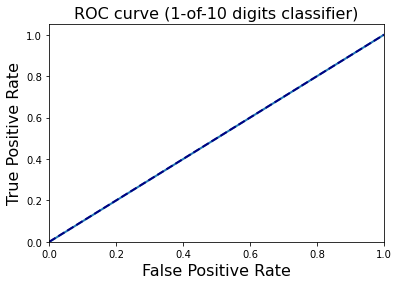

In [130]:
# models('DummyClassifier-grid',DummyClassifier(strategy = 'most_frequent'),x_train_selected,y_train,x_test_selected,y_test,DummyClassifier(),'strategy',['most_frequent','prior'])
models('logistic regression-grid',PolynomialRegression(degree=2,penalty = 'l1',C = 0.01),x_train_selected,y_train,x_test_selected,y_test,LogisticRegression(),'C',[1,7])
models('knn-grid',KNeighborsClassifier(metric ='euclidean',n_neighbors = 18 ),x_train_selected,y_train,x_test_selected,y_test,KNeighborsClassifier(),'weights',['uniform', 'distance'])
models('guassianNB-grid',GaussianNB(var_smoothing = 1),x_train_selected,y_train,x_test_selected,y_test,GaussianNB(),'var_smoothing',[1e-2,1e-1,1])
models('support vector machine-grid',SVC(random_state=0,kernel = 'linear',gamma = 0.001,C = 0.001),x_train_selected,y_train,x_test_selected,y_test,SVC(),'degree',[3,5,7])
models('DecisionTree Classifier-grid',DecisionTreeClassifier(random_state=0,criterion = 'gini',max_depth = 3,max_leaf_nodes = 2),x_train_selected,y_train,x_test_selected,y_test,DecisionTreeClassifier(),'max_depth',[5,10,15,20])
models('RandomForestClassifier-grid',RandomForestClassifier(random_state=0,max_depth = 8,criterion = 'gini'),x_train_selected,y_train,x_test_selected,y_test,RandomForestClassifier(random_state=0),'n_estimators',[100,120,150])
# models('AdaBoostClassifier-grid',AdaBoostClassifier(random_state=0),x_train_selected,y_train,x_test_selected,y_test,AdaBoostClassifier(),'n_estimators',[50,100,150])

In [145]:

pd.set_option('display.max_rows', 100)

In [155]:
results11 = results.loc[1:7]
results11

Model Train_Score Test_Score Precision    Recall  \
1      logistic regression-OneHot    0.950211   0.952607       0.0       0.0   
2                      knn-OneHot    0.951791   0.952607       0.5      0.05   
3               guassianNB-OneHot    0.182297   0.176145  0.052775  0.966667   
4   support vector machine-OneHot    0.950211   0.952607       0.0       0.0   
5  DecisionTree Classifier-OneHot         1.0   0.908373  0.111111  0.133333   
6   RandomForestClassifier-OneHot         1.0   0.952607       0.0       0.0   
7       AdaBoostClassifier-OneHot    0.951528   0.951817       0.0       0.0   

        Auc        F1  
1       0.5       0.0  
2  0.523756  0.090909  
3  0.551741  0.100086  
4       0.5       0.0  
5  0.540133  0.121212  
6       0.5       0.0  
7  0.499585       0.0

In [156]:
results11 = results.loc[8:15]
results11

Model Train_Score Test_Score Precision  \
8           DummyClassifier-stdScaler    0.950211   0.952607       0.0   
9       logistic regression-stdScaler    0.950211   0.952607       0.5   
10                      knn-stdScaler    0.951001   0.951817  0.333333   
11               guassianNB-stdScaler     0.18177   0.173776  0.052632   
12   support vector machine-stdScaler    0.950211   0.952607       0.0   
13  DecisionTree Classifier-stdScaler         1.0   0.909953  0.114286   
14   RandomForestClassifier-stdScaler         1.0   0.952607       0.0   
15       AdaBoostClassifier-stdScaler    0.951528   0.951817       0.0   

      Recall       Auc        F1  
8        0.0       0.5       0.0  
9   0.016667  0.507919  0.032258  
10  0.016667  0.507504  0.031746  
11  0.966667  0.550498  0.099828  
12       0.0       0.5       0.0  
13  0.133333  0.540962  0.123077  
14       0.0       0.5       0.0  
15       0.0  0.499585       0.0

In [157]:
results11 = results.loc[16:23]
results11

Model Train_Score Test_Score Precision  \
16          DummyClassifier-minmaxScaler    0.950211   0.952607       0.0   
17      logistic regression-minmaxScaler    0.950211   0.952607       0.0   
18                      knn-minmaxScaler    0.951791   0.952607       0.5   
19               guassianNB-minmaxScaler    0.182297   0.176145  0.052775   
20   support vector machine-minmaxScaler    0.950211   0.952607       0.0   
21  DecisionTree Classifier-minmaxScaler         1.0   0.909163  0.112676   
22   RandomForestClassifier-minmaxScaler         1.0   0.952607       0.0   
23       AdaBoostClassifier-minmaxScaler    0.951528   0.951817       0.0   

      Recall       Auc        F1  
16       0.0       0.5       0.0  
17       0.0       0.5       0.0  
18      0.05  0.523756  0.090909  
19  0.966667  0.551741  0.100086  
20       0.0       0.5       0.0  
21  0.133333  0.540547  0.122137  
22       0.0       0.5       0.0  
23       0.0  0.499585       0.0

In [158]:
results11 = results.loc[24:31]
results11

Model Train_Score Test_Score  \
24          DummyClassifier-percentileFSelect    0.950211   0.952607   
25      logistic regression-percentileFSelect    0.950211   0.951817   
26                      knn-percentileFSelect    0.952845   0.951027   
27               guassianNB-percentileFSelect    0.334563   0.349131   
28   support vector machine-percentileFSelect    0.950211   0.952607   
29  DecisionTree Classifier-percentileFSelect         1.0   0.920221   
30   RandomForestClassifier-percentileFSelect         1.0   0.945498   
31       AdaBoostClassifier-percentileFSelect    0.950738   0.951817   

   Precision    Recall       Auc        F1  
24       0.0       0.0       0.5       0.0  
25       0.0       0.0  0.499585       0.0  
26     0.375      0.05  0.522927  0.088235  
27  0.065909  0.966667  0.642537  0.123404  
28       0.0       0.0       0.5       0.0  
29  0.127273  0.116667  0.538433  0.121739  
30  0.090909  0.016667  0.504187  0.028169  
31       0.0       0.0  0.499585       0.0

In [160]:
results11 = results.loc[32:39]
results11

Model Train_Score Test_Score Precision  \
32          DummyClassifier-kbestFSelect    0.950211   0.952607       0.0   
33      logistic regression-kbestFSelect    0.950211   0.952607       0.0   
34                      knn-kbestFSelect    0.953372   0.950237  0.333333   
35               guassianNB-kbestFSelect    0.342729    0.35387  0.066362   
36   support vector machine-kbestFSelect    0.950211   0.952607       0.0   
37  DecisionTree Classifier-kbestFSelect         1.0   0.921011  0.142857   
38   RandomForestClassifier-kbestFSelect         1.0   0.945498  0.090909   
39       AdaBoostClassifier-kbestFSelect    0.950738   0.951817       0.0   

      Recall       Auc        F1  
32       0.0       0.5       0.0  
33       0.0       0.5       0.0  
34      0.05  0.522512  0.086957  
35  0.966667  0.645025  0.124197  
36       0.0       0.5       0.0  
37  0.133333  0.546766  0.137931  
38  0.016667  0.504187  0.028169  
39       0.0  0.499585       0.0

In [161]:
results11 = results.loc[40:47]
results11

Model Train_Score Test_Score Precision  \
40          DummyClassifier-genericFSelect    0.950211   0.952607       0.0   
41      logistic regression-genericFSelect    0.950211   0.952607       0.0   
42                      knn-genericFSelect    0.954426   0.950237  0.333333   
43               guassianNB-genericFSelect    0.343256    0.35466  0.066438   
44   support vector machine-genericFSelect    0.950211   0.952607       0.0   
45  DecisionTree Classifier-genericFSelect         1.0   0.919431  0.096154   
46   RandomForestClassifier-genericFSelect         1.0   0.945498  0.153846   
47       AdaBoostClassifier-genericFSelect    0.950738   0.951817       0.0   

      Recall       Auc        F1  
40       0.0       0.5       0.0  
41       0.0       0.5       0.0  
42      0.05  0.522512  0.086957  
43  0.966667  0.645439   0.12433  
44       0.0       0.5       0.0  
45  0.083333  0.522181  0.089286  
46  0.033333  0.512106  0.054795  
47       0.0  0.499585       0.0

In [162]:
results11 = results.loc[48:55]
results11

Model Train_Score Test_Score Precision  \
48          DummyClassifier-modelFSelect    0.950211   0.952607       0.0   
49      logistic regression-modelFSelect    0.950211   0.952607       0.0   
50                      knn-modelFSelect    0.951264   0.947867       0.0   
51               guassianNB-modelFSelect    0.871707   0.878357  0.186667   
52   support vector machine-modelFSelect    0.950211   0.952607       0.0   
53  DecisionTree Classifier-modelFSelect         1.0   0.909953  0.102941   
54   RandomForestClassifier-modelFSelect         1.0   0.949447       0.0   
55       AdaBoostClassifier-modelFSelect    0.950738   0.952607       0.5   

      Recall       Auc        F1  
48       0.0       0.5       0.0  
49       0.0       0.5       0.0  
50       0.0  0.497512       0.0  
51  0.466667  0.682753  0.266667  
52       0.0       0.5       0.0  
53  0.116667  0.533043  0.109375  
54       0.0  0.498342       0.0  
55  0.016667  0.507919  0.032258

In [163]:
results11 = results.loc[56:63]
results11

Model Train_Score Test_Score Precision  \
56          DummyClassifier-rfeFSelect    0.950211   0.952607       0.0   
57      logistic regression-rfeFSelect    0.950211   0.952607       0.0   
58                      knn-rfeFSelect    0.951791   0.952607       0.5   
59               guassianNB-rfeFSelect    0.182297   0.176145  0.052775   
60   support vector machine-rfeFSelect    0.950211   0.952607       0.0   
61  DecisionTree Classifier-rfeFSelect         1.0   0.909163  0.112676   
62   RandomForestClassifier-rfeFSelect         1.0   0.952607       0.0   
63       AdaBoostClassifier-rfeFSelect    0.951528   0.951817       0.0   

      Recall       Auc        F1  
56       0.0       0.5       0.0  
57       0.0       0.5       0.0  
58      0.05  0.523756  0.090909  
59  0.966667  0.551741  0.100086  
60       0.0       0.5       0.0  
61  0.133333  0.540547  0.122137  
62       0.0       0.5       0.0  
63       0.0  0.499585       0.0

In [164]:
results11 = results.loc[64:71]
results11

Model Train_Score Test_Score Precision Recall  \
64      logistic regression-grid    0.950211   0.952607       0.0    0.0   
65                      knn-grid    0.950211   0.952607       0.0    0.0   
66               guassianNB-grid    0.950211   0.952607       0.0    0.0   
67   support vector machine-grid    0.950211   0.952607       0.0    0.0   
68  DecisionTree Classifier-grid    0.950211   0.952607       0.0    0.0   
69   RandomForestClassifier-grid    0.954953   0.951817       0.0    0.0   

         Auc   F1  
64       0.5  0.0  
65       0.5  0.0  
66       0.5  0.0  
67       0.5  0.0  
68       0.5  0.0  
69  0.499585  0.0